In [1]:
import numpy as np
from Temporal_Community_Detection import temporal_network
from helpers import *
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score, f1_score
from math import floor
import random
import matplotlib as mpl

## Community Grow with MMM-- Heavy tailed size, Changing Spike Rate

In [2]:
path = '/Users/bengieru/MLN/Results/Comparison/G_ESCR/'

interlayers = np.linspace(0, 1.50, 51)
resolutions = np.linspace(0, 1.50, 51)


with open(path + 'MMM_labels_global_update.pkl', 'rb') as handle:
    G_ESCR_labels2 = pickle.load(handle)
with open(path + 'MMM_labels_local_update.pkl', 'rb') as handle:
    G_ESCR_labels1 = pickle.load(handle)
with open(path + 'MMM_labels_no_update.pkl', 'rb') as handle:
    G_ESCR_labels0 = pickle.load(handle)
    
with open(path + 'comm_size.pkl', 'rb') as handle:
    G_ESCR_comm_sizes = pickle.load(handle)
with open(path + 'spikes.pkl', 'rb') as handle:
    G_ESCR_spikes = pickle.load(handle)

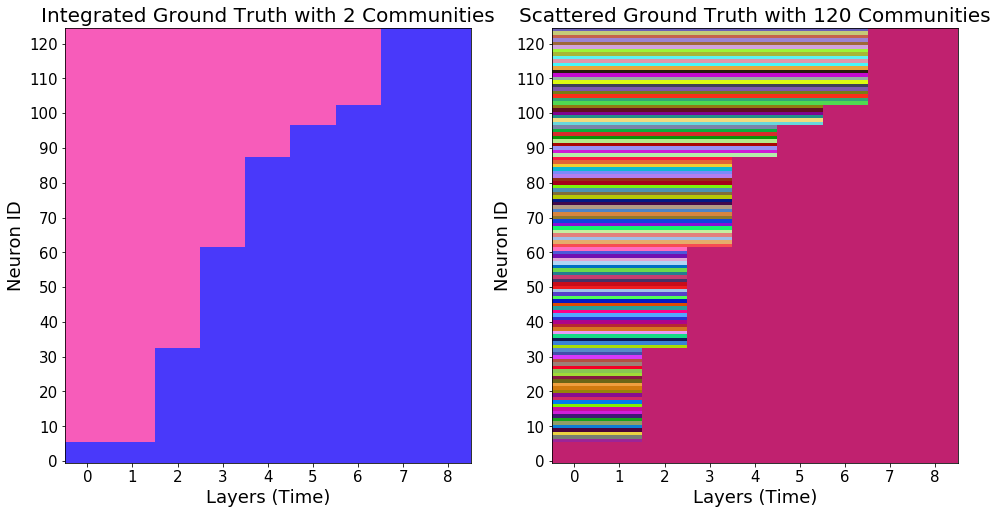

In [3]:
display_truth(G_ESCR_comm_sizes, community_operation = 'grow')

In [4]:
fig,ax = information_recovery(G_ESCR_labels0, G_ESCR_comm_sizes, 'Scattered', interlayers, resolutions,'grow')

ValueError: Found input variables with inconsistent numbers of samples: [875, 1125]

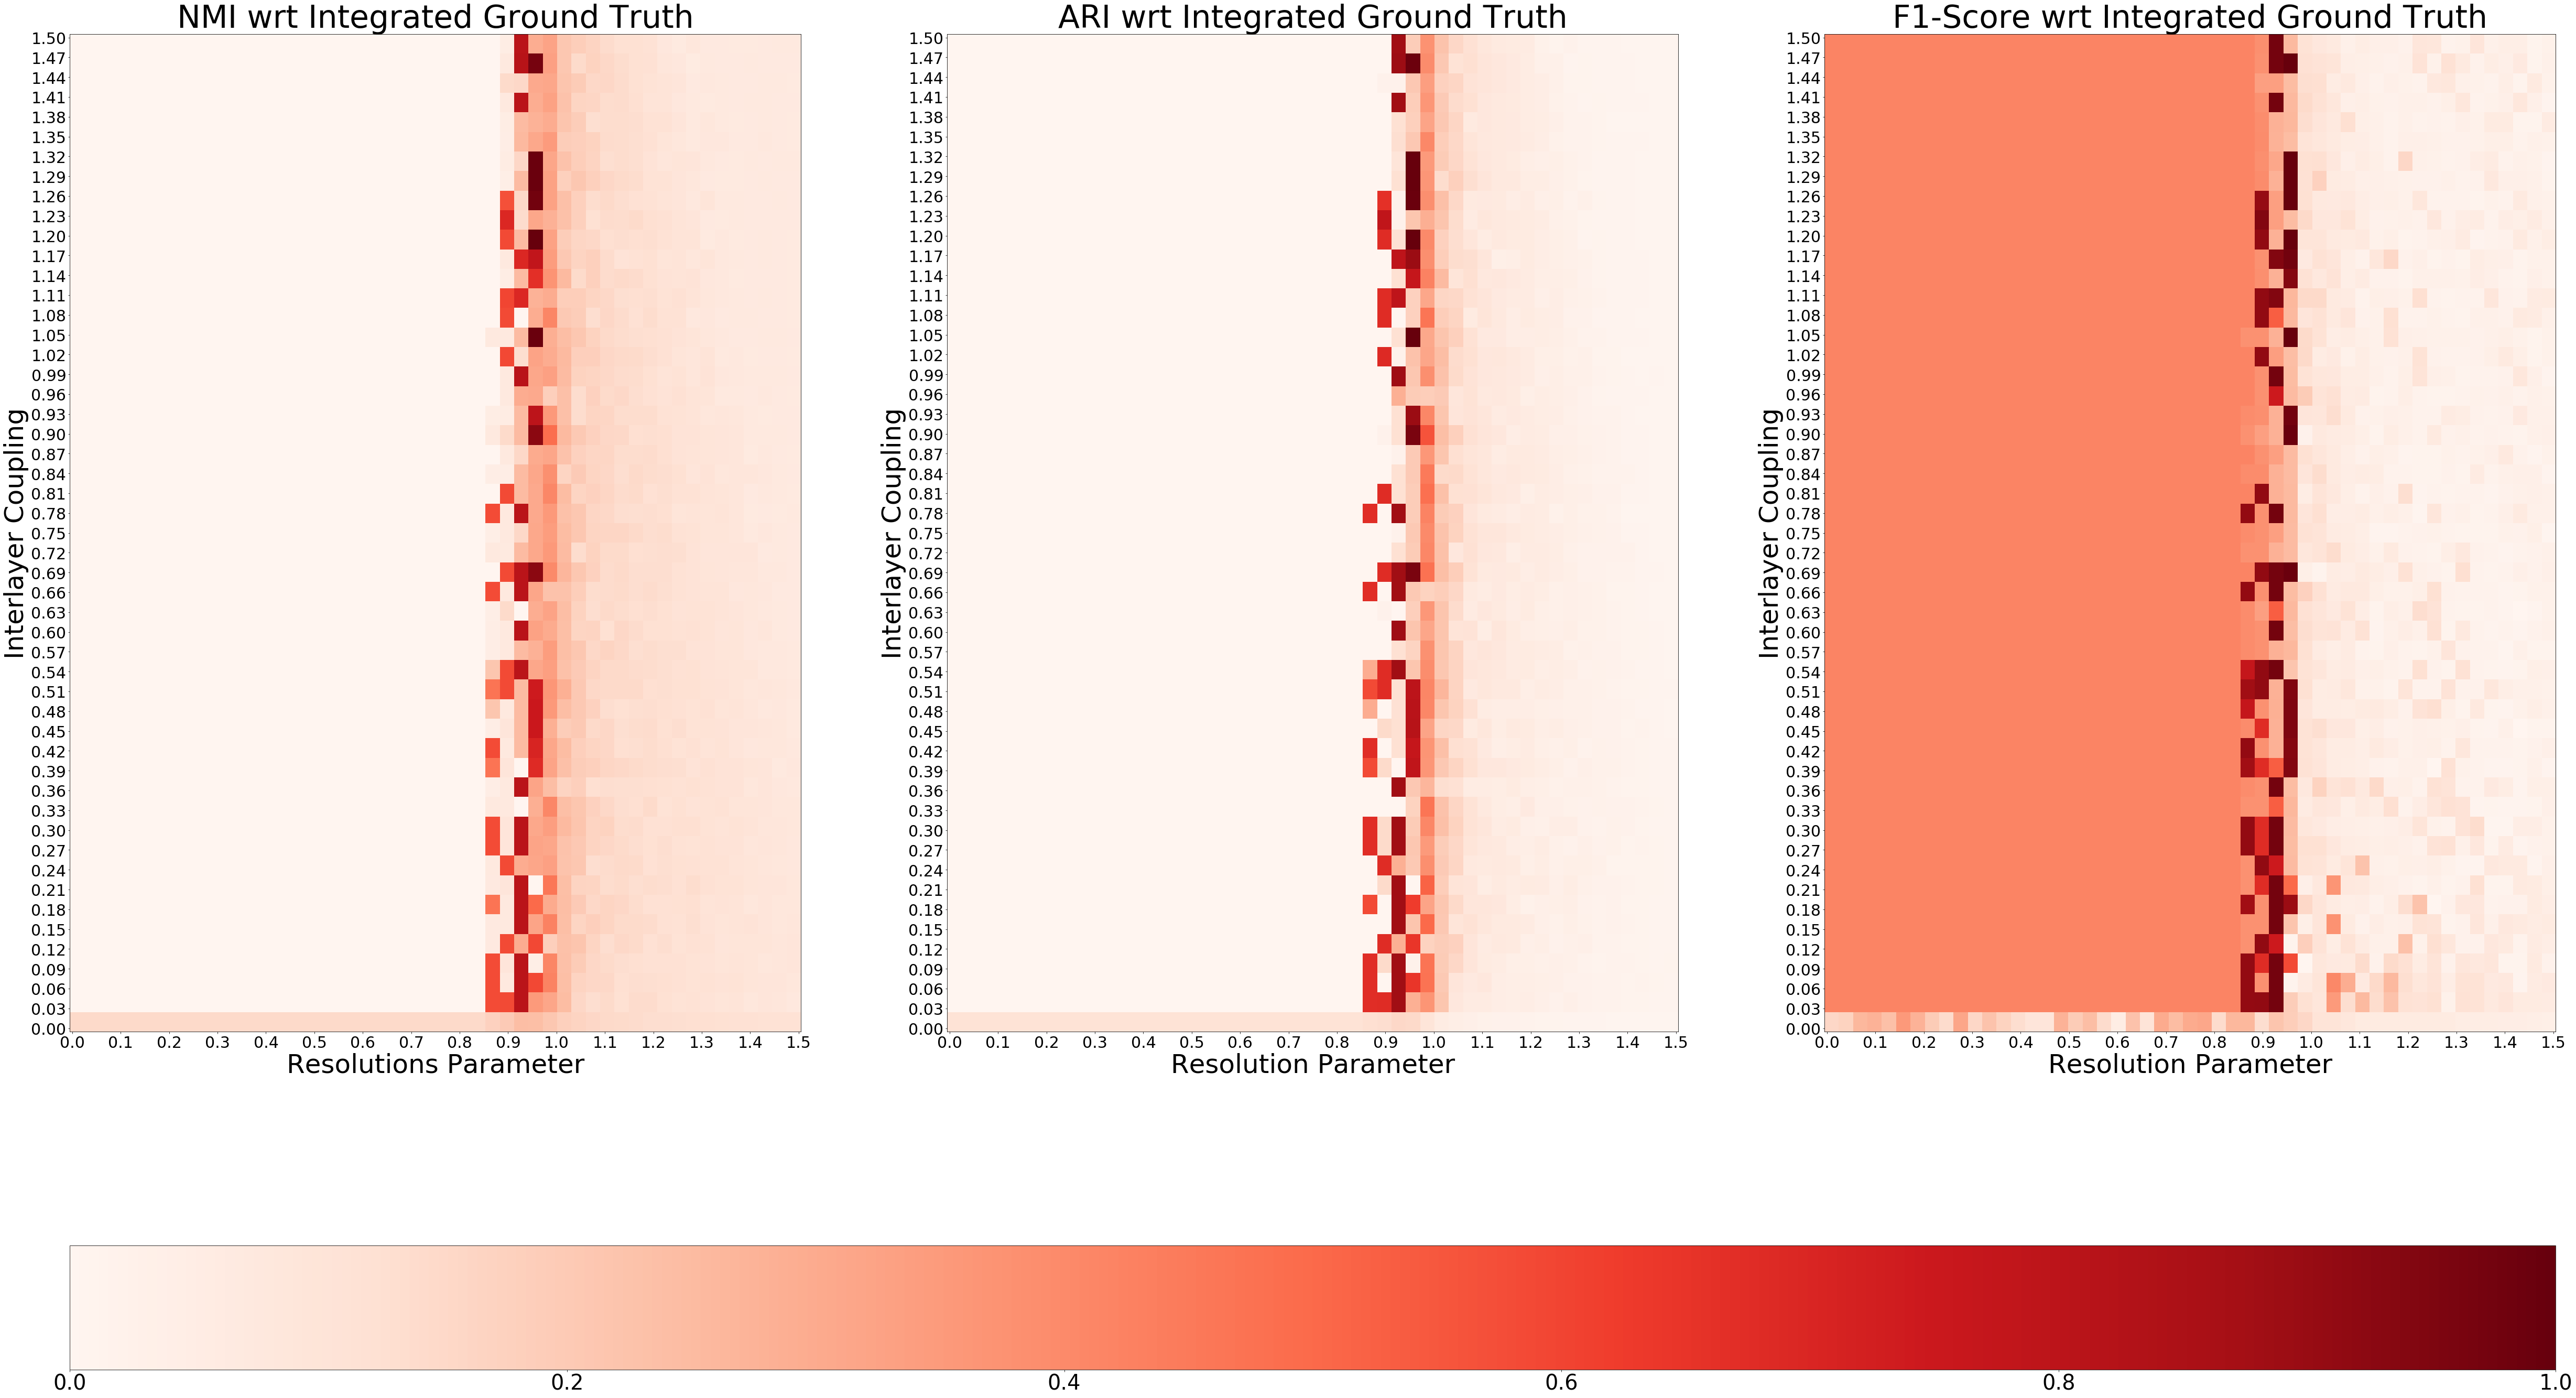

In [12]:
fig, ax = information_recovery(G_ESCR_labels0, G_ESCR_comm_sizes, 'Integrated', interlayers, resolutions, 'grow')

In [13]:
max_recovery = np.zeros((147,1125))##
for i,e in enumerate(interlayers[2:]):##
    max_recovery[i*3:(i+1)*3] = G_ESCR_labels2[i*51+31:i*51+34]##

In [14]:
consensus_partition1 = community_consensus_iterative(max_recovery)##

In [15]:
n = sum(G_ESCR_comm_sizes)##
t = 9
comms, cmap, color = consensus_display(consensus_partition1, n, t)##

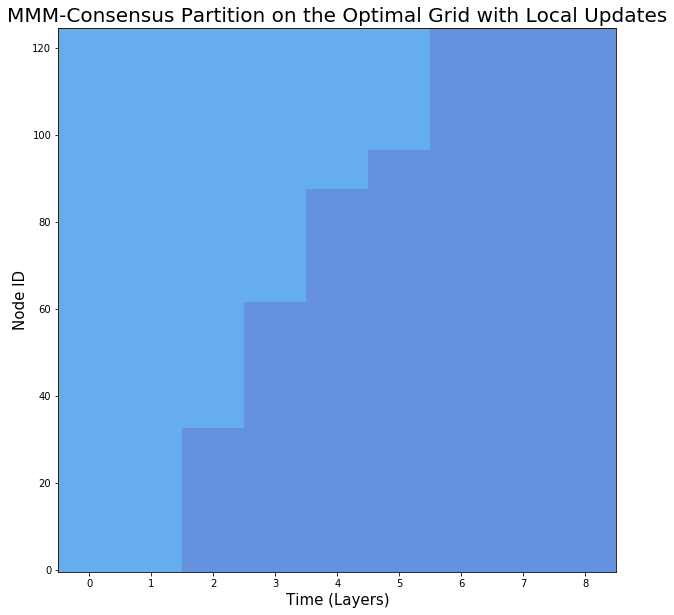

In [16]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(comms, interpolation = 'none', cmap = cmap, 
          aspect = 'auto', origin = 'lower', extent = [-0.5,t-0.5,-0.5,n-0.5])
ax.set_title('MMM-Consensus Partition on the Optimal Grid with Local Updates', fontsize = 20)
ax.set_xlabel('Time (Layers)', fontsize = 15)
ax.set_ylabel('Node ID', fontsize = 15)
fig.savefig(path + 'consensus_on_optimal.pdf')

CPU times: user 2min, sys: 1.63 s, total: 2min 2s
Wall time: 2min 10s


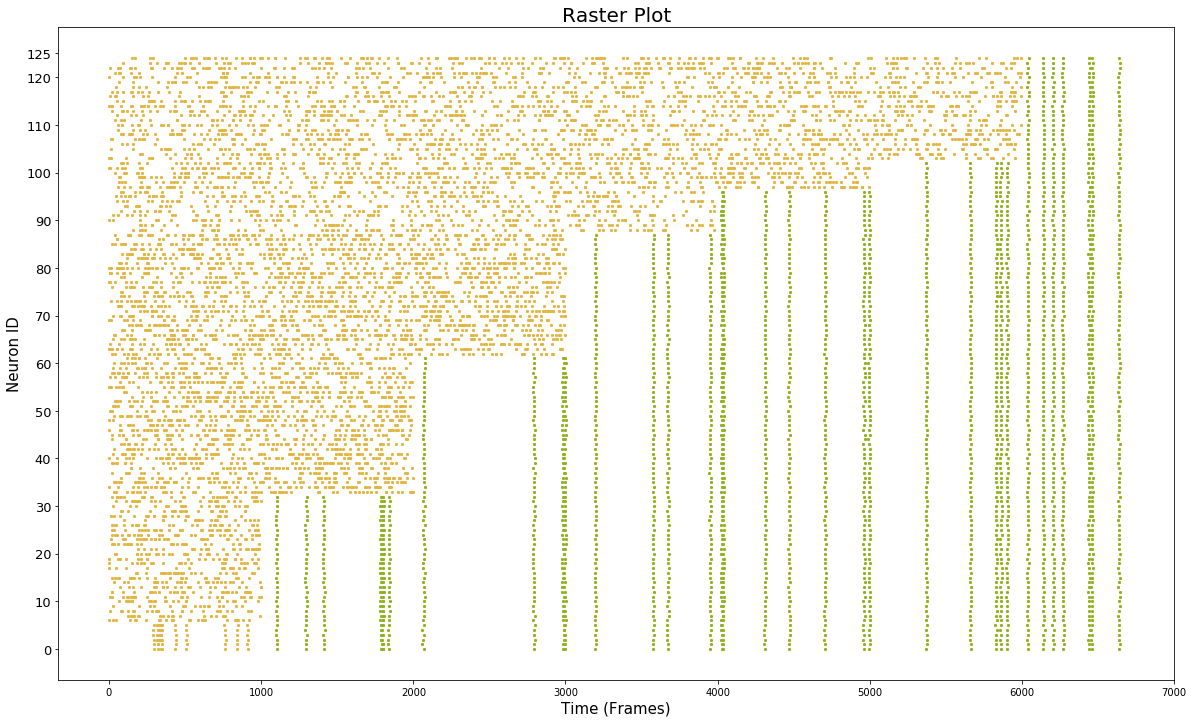

In [10]:
%%time
binsize = 1000
binned_spikes = bin_time_series(G_ESCR_spikes, binsize, gaussian = False)##
l,n,t = binned_spikes.shape
                    
sp = np.nonzero(binned_spikes)

clr = comms[:,1:8]##
fig,ax = plt.subplots(1,1,figsize = (20,12)) 
for i in range(len(sp[0])):
    ax.scatter(sp[0][i]*binsize+sp[2][i],  sp[1][i], s = 5, 
               c = color[int(clr[sp[1][i]][sp[0][i]])], marker = 'x', cmap = cmap)
ax.set_title('Raster Plot', fontsize = 20)
ax.set_xlabel('Time (Frames)', fontsize = 15)
ax.set_ylabel('Neuron ID', fontsize = 15)
ax.set_xticks([t*i for i in range(l+1)])
ax.set_yticks([10*i for i in range(int(n/10)+1)]+[n])
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 13)
fig.savefig(path + 'raster.pdf')

## Community Grow with Infomap, Heavy tailed commubnity sizes, chanigng spike rate

In [2]:
path = '/Users/bengieru/MLN/Results/Comparison/G_ESCR/'

grid = 51
threshs = np.linspace(0, 0.8, grid)
inters = np.linspace(0, 1.5, grid)


with open(path + 'infomap_labels_nbr_update.pkl', 'rb') as handle:
    G_ESCR_labels3 = pickle.load(handle)
with open(path + 'infomap_labels_global_update.pkl', 'rb') as handle:
    G_ESCR_labels2 = pickle.load(handle)
with open(path + 'infomap_labels_local_update.pkl', 'rb') as handle:
    G_ESCR_labels1 = pickle.load(handle)
with open(path + 'infomap_labels_no_update.pkl', 'rb') as handle:
    G_ESCR_labels0 = pickle.load(handle)
    
with open(path + 'comm_size.pkl', 'rb') as handle:
    G_ESCR_comm_sizes = pickle.load(handle)
with open(path + 'spikes.pkl', 'rb') as handle:
    G_ESCR_spikes = pickle.load(handle)

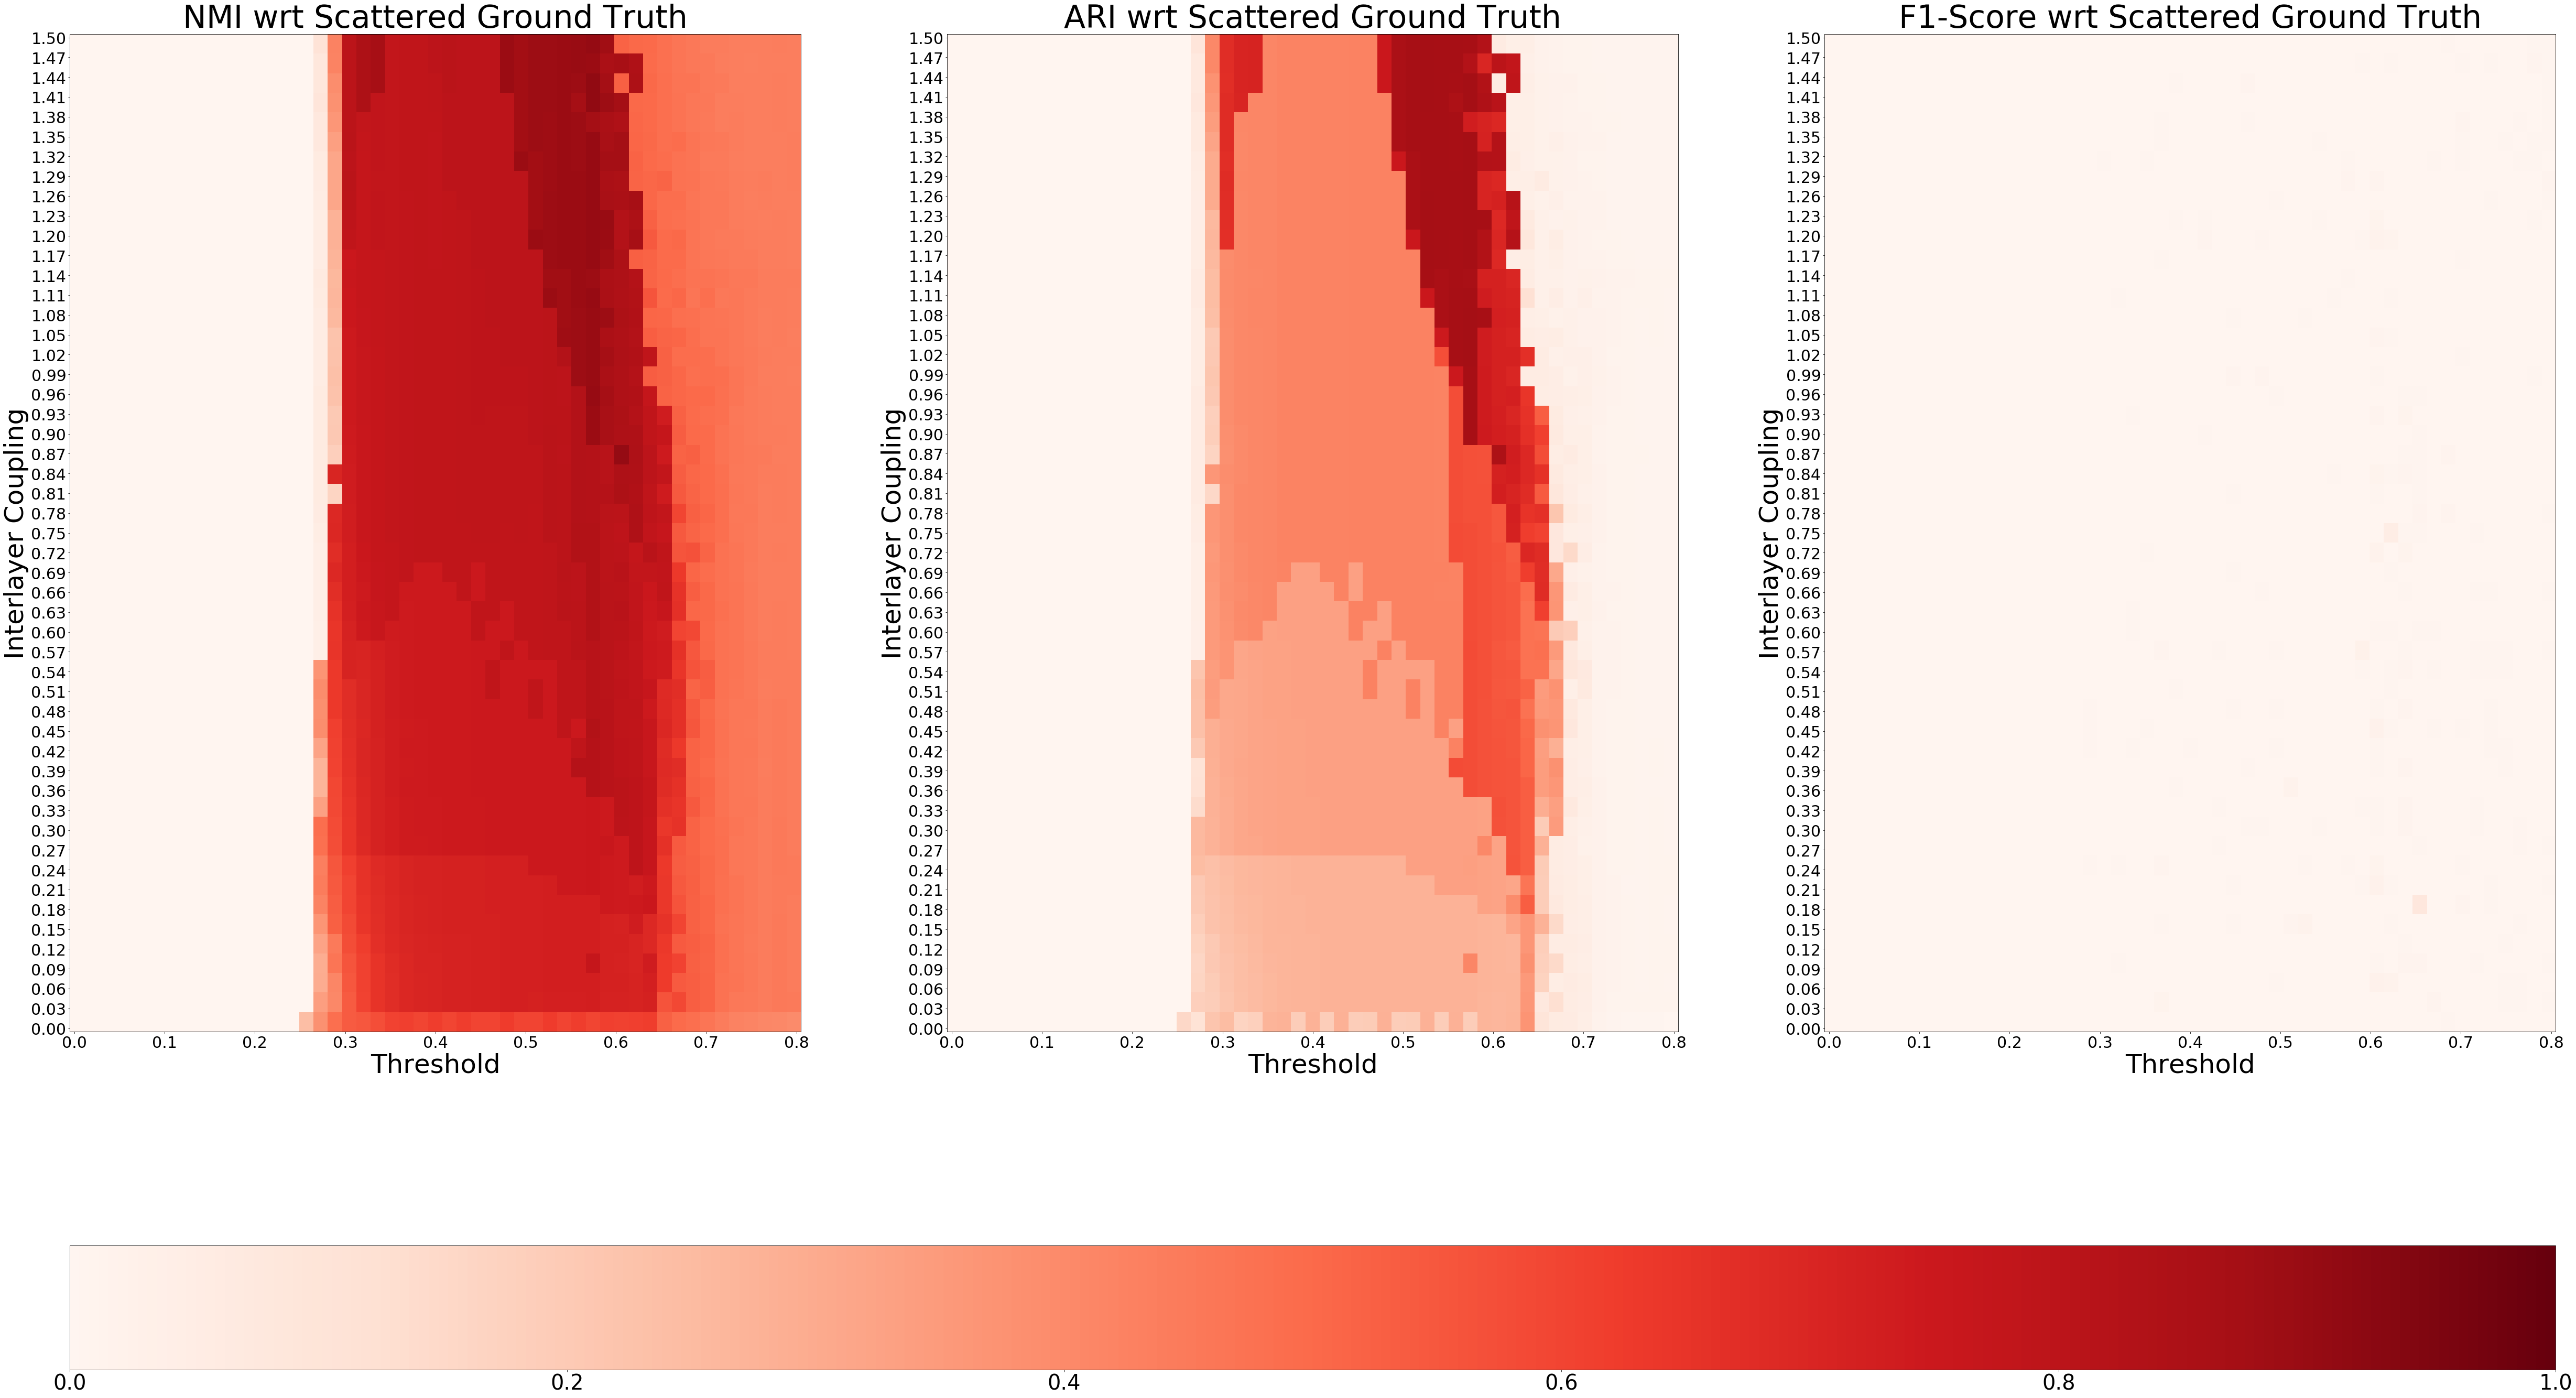

In [3]:
fig,ax = information_recovery(G_ESCR_labels0, G_ESCR_comm_sizes, 'Scattered', inters, threshs,'grow')

In [4]:
max_recovery = np.zeros((28,1125))##
for i,e in enumerate(inters[41:48]):##
    max_recovery[i*4:(i+1)*4] = G_ESCR_labels0[(41+i)*51+32:(41+i)*51+36]##

In [5]:
consensus_partition0 = community_consensus_iterative(max_recovery)##

In [6]:
n = sum(G_ESCR_comm_sizes)##
t = 9
comms, cmap, color = consensus_display(consensus_partition0, n, t)##

Text(0, 0.5, 'Node ID')

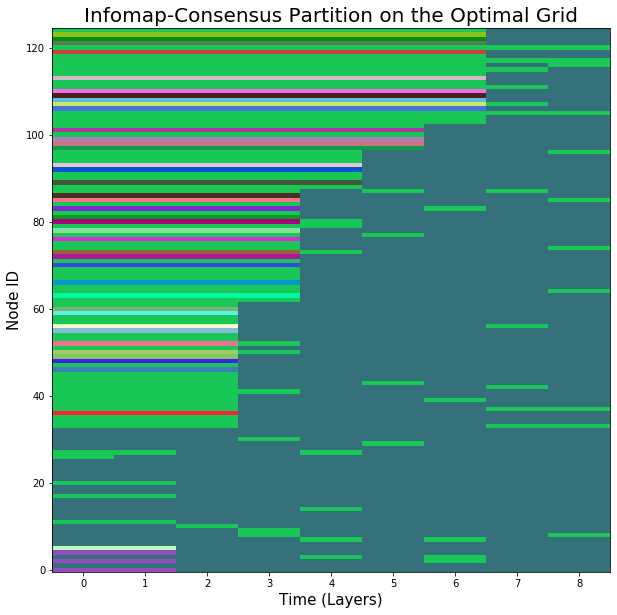

In [7]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(comms, interpolation = 'none', cmap = cmap, 
          aspect = 'auto', origin = 'lower', extent = [-0.5,t-0.5,-0.5,n-0.5])
ax.set_title('Infomap-Consensus Partition on the Optimal Grid', fontsize = 20)
ax.set_xlabel('Time (Layers)', fontsize = 15)
ax.set_ylabel('Node ID', fontsize = 15)

KeyboardInterrupt: 

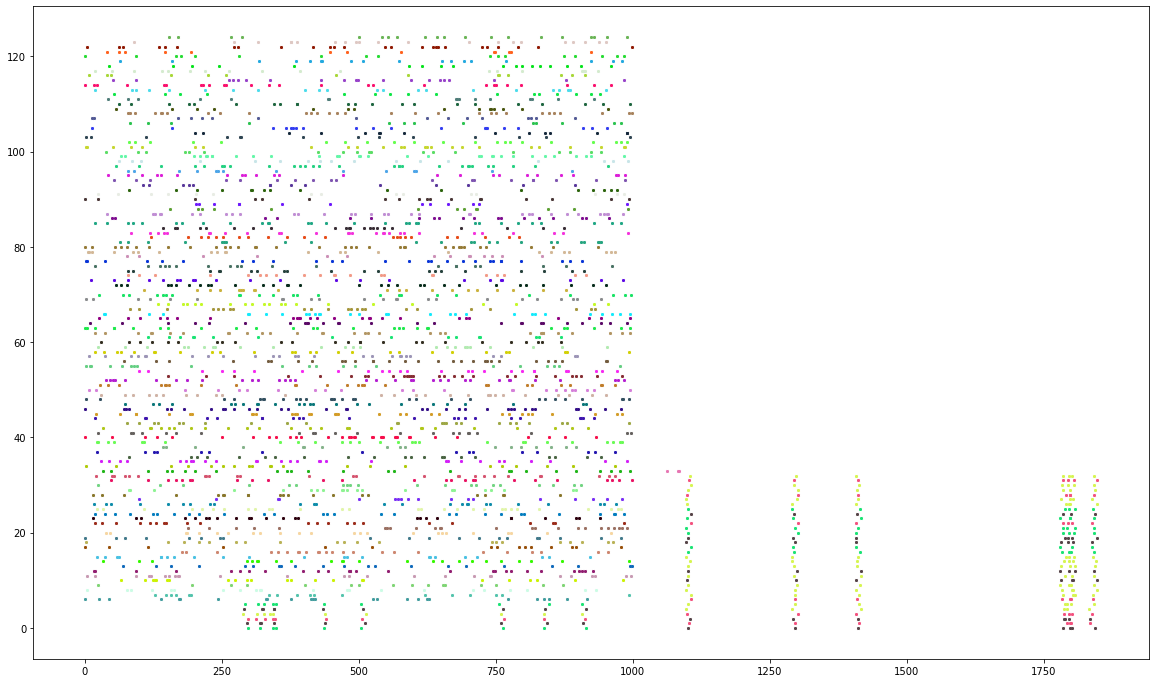

In [8]:
%%time
binsize = 1000
binned_spikes = bin_time_series(G_ESCR_spikes, binsize, gaussian = False)##
l,n,t = binned_spikes.shape
                    
sp = np.nonzero(binned_spikes)

clr = comms[:,1:8]##
fig,ax = plt.subplots(1,1,figsize = (20,12)) 
for i in range(len(sp[0])):
    ax.scatter(sp[0][i]*binsize+sp[2][i],  sp[1][i], s = 5, 
               c = color[int(clr[sp[1][i]][sp[0][i]])], marker = 'x', cmap = cmap)
ax.set_title('Raster Plot', fontsize = 20)
ax.set_xlabel('Time (Frames)', fontsize = 15)
ax.set_ylabel('Neuron ID', fontsize = 15)
ax.set_xticks([t*i for i in range(l+1)])
ax.set_yticks([10*i for i in range(int(n/10)+1)]+[n])
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 13)

## Community Merge, heavy tail, changing rate, MMM

In [2]:
path = '/Users/bengieru/MLN/Results/Comparison/M_ESCR/'

interlayers = np.linspace(0, 1.50, 51)
resolutions = np.linspace(0, 1.50, 51)


with open(path + 'MMM_labels_global_update.pkl', 'rb') as handle:
    M_ESCR_labels2 = pickle.load(handle)
with open(path + 'MMM_labels_local_update.pkl', 'rb') as handle:
    M_ESCR_labels1 = pickle.load(handle)
with open(path + 'MMM_labels_no_update.pkl', 'rb') as handle:
    M_ESCR_labels0 = pickle.load(handle)
    
with open(path + 'comm_size.pkl', 'rb') as handle:
    M_ESCR_comm_sizes = pickle.load(handle)
with open(path + 'spikes.pkl', 'rb') as handle:
    M_ESCR_spikes = pickle.load(handle)

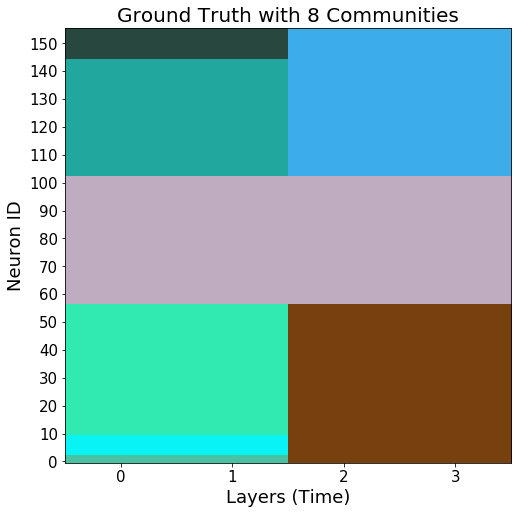

In [3]:
display_truth(M_ESCR_comm_sizes, community_operation = 'merge')

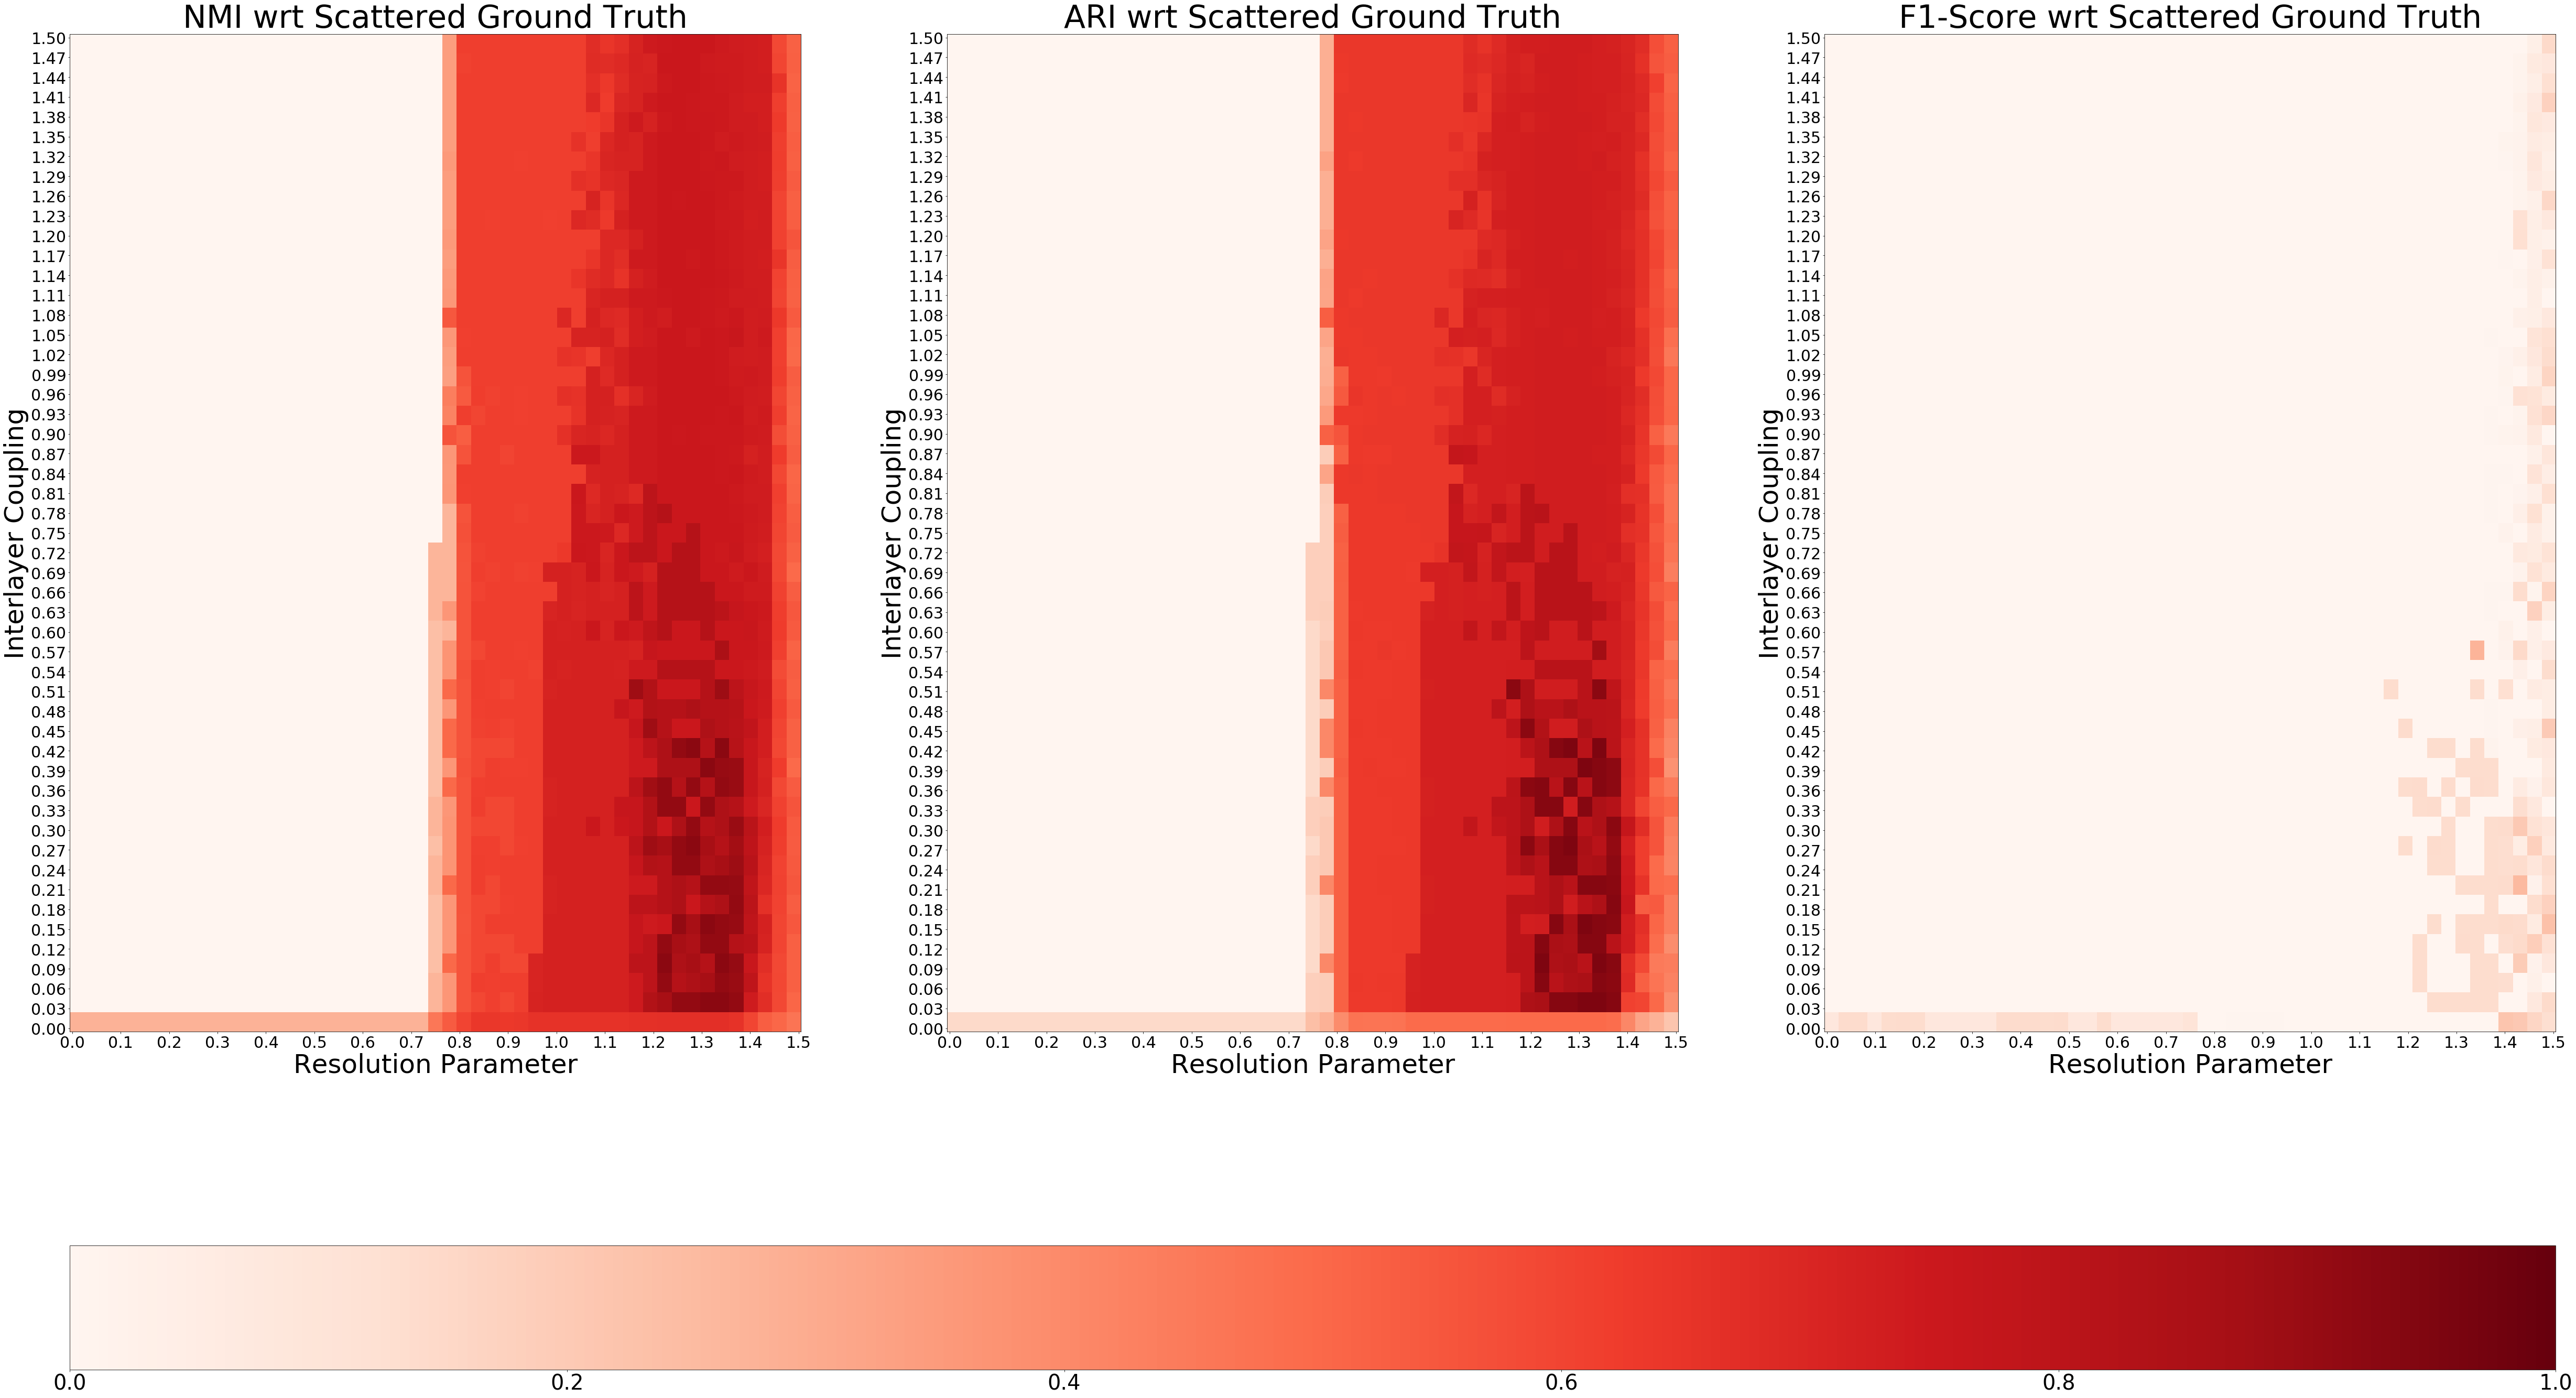

In [4]:
fig,ax = information_recovery(M_ESCR_labels0, M_ESCR_comm_sizes, 'Scattered', interlayers, resolutions,'merge')

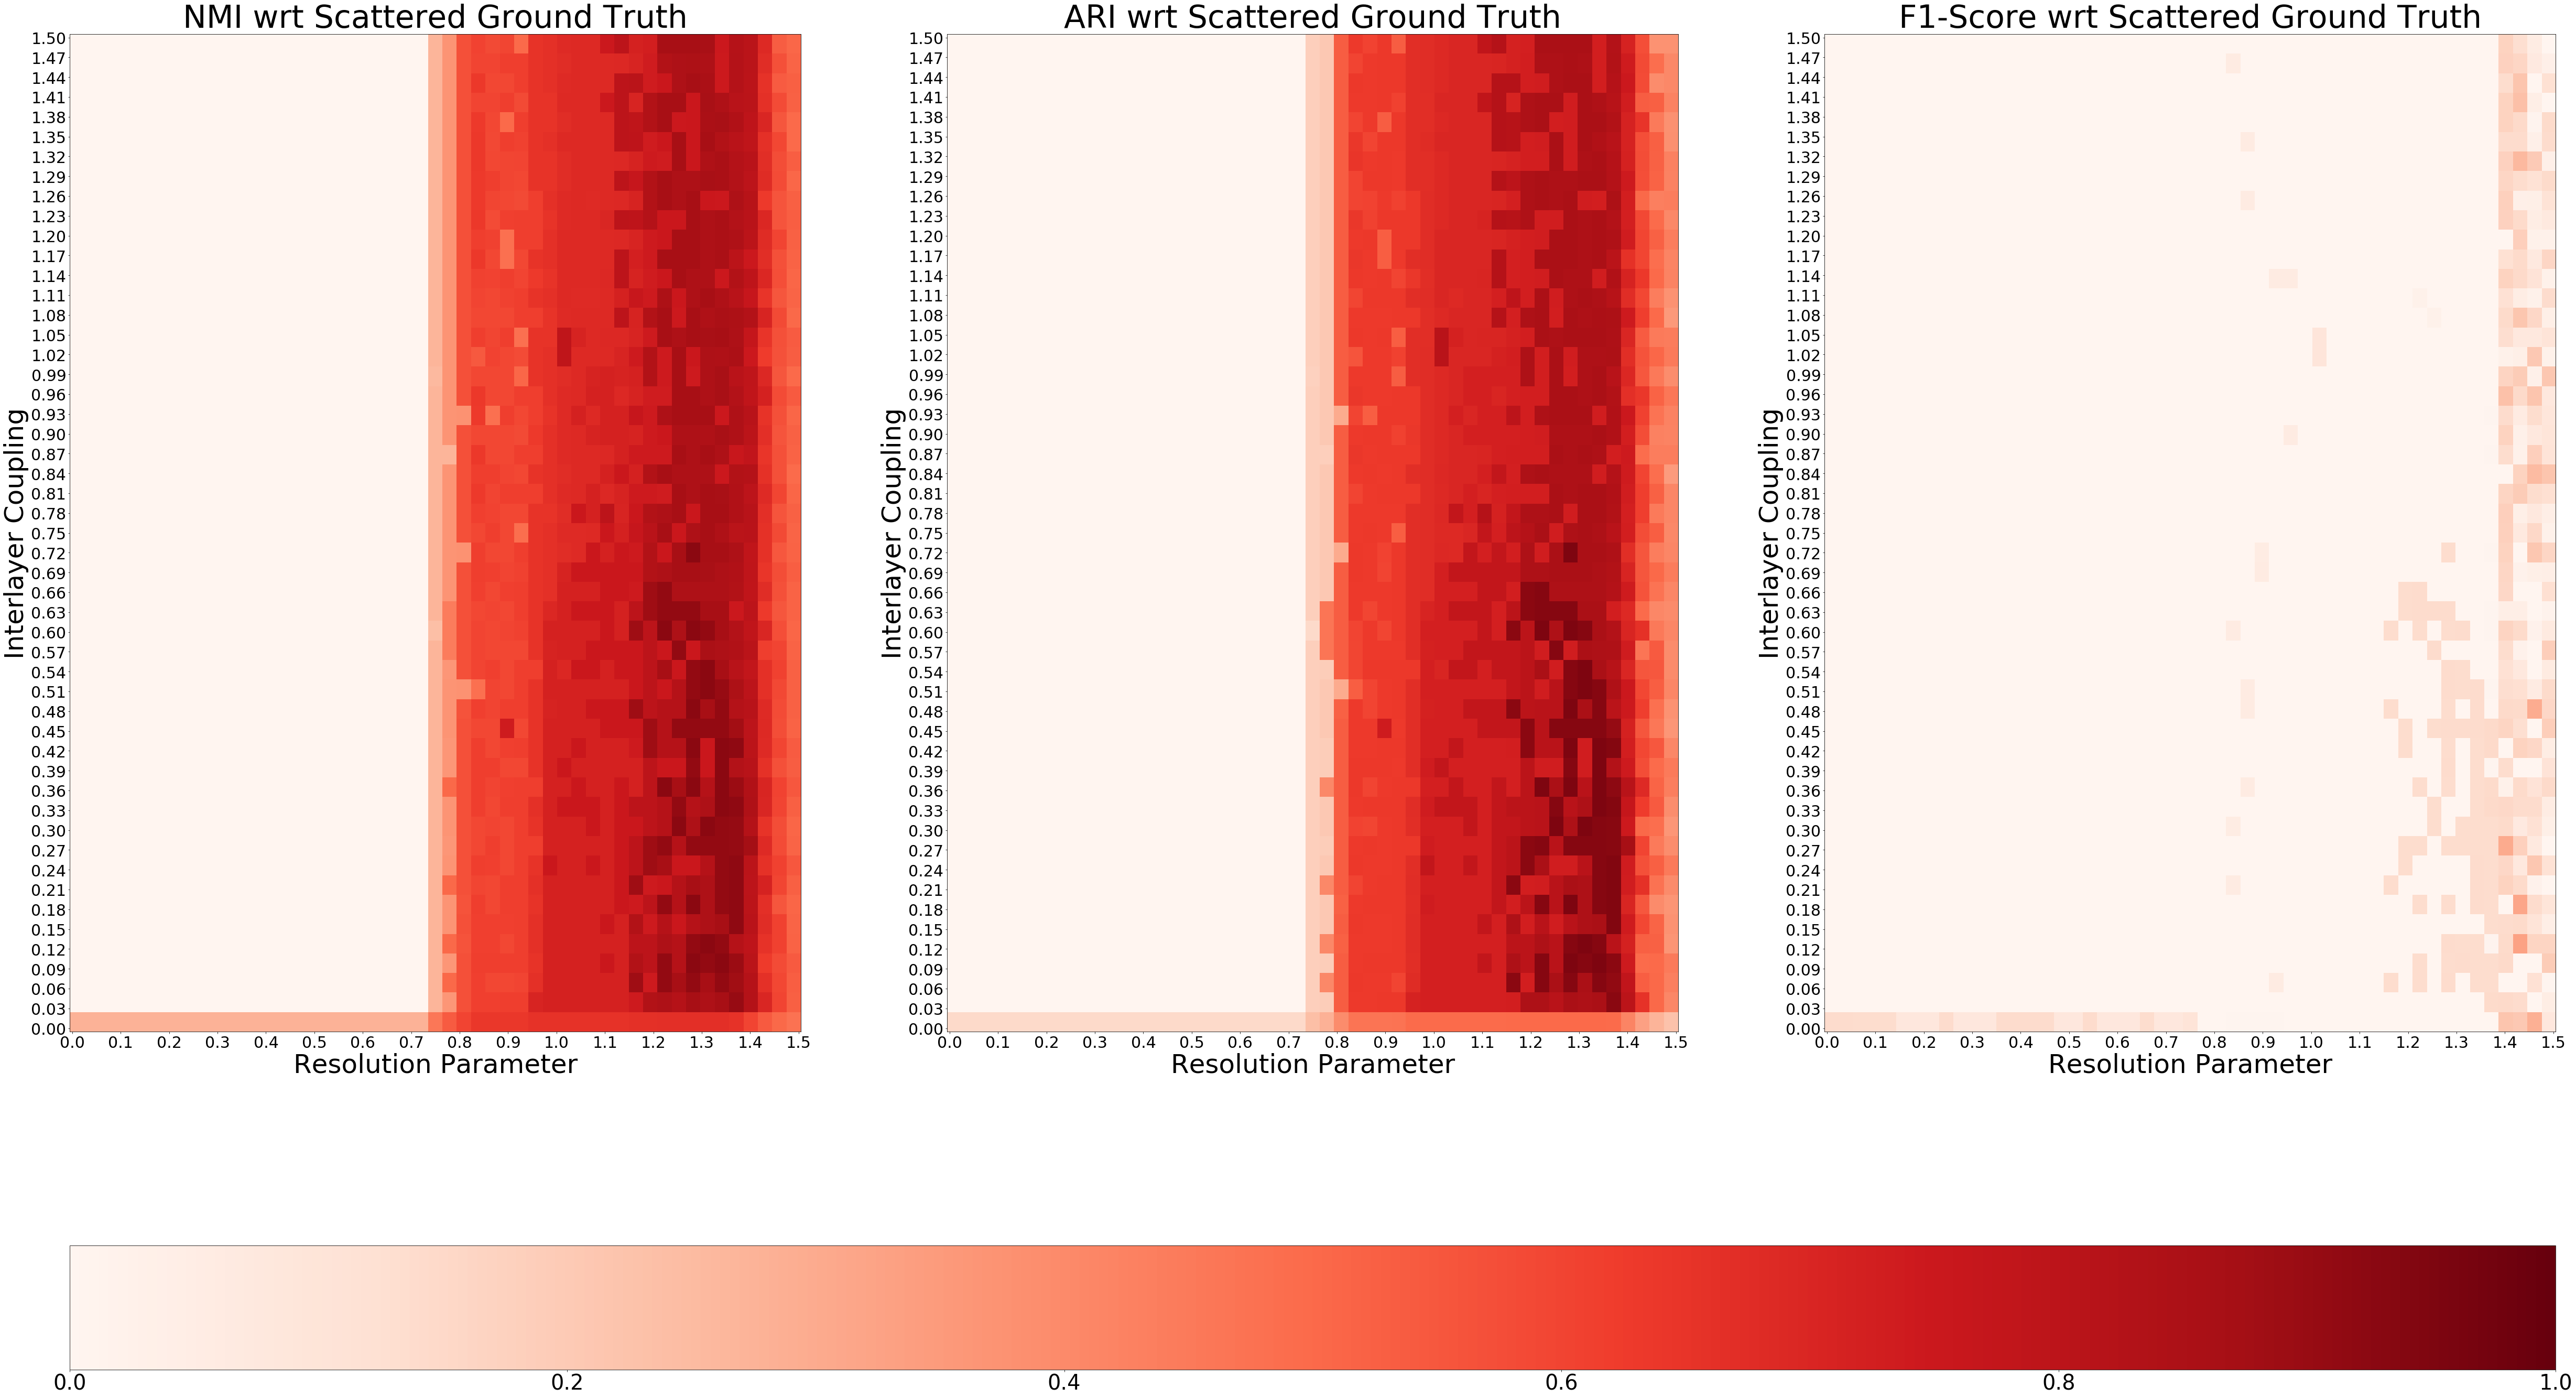

In [5]:
fig,ax = information_recovery(M_ESCR_labels1, M_ESCR_comm_sizes, 'Scattered', interlayers, resolutions,'merge')

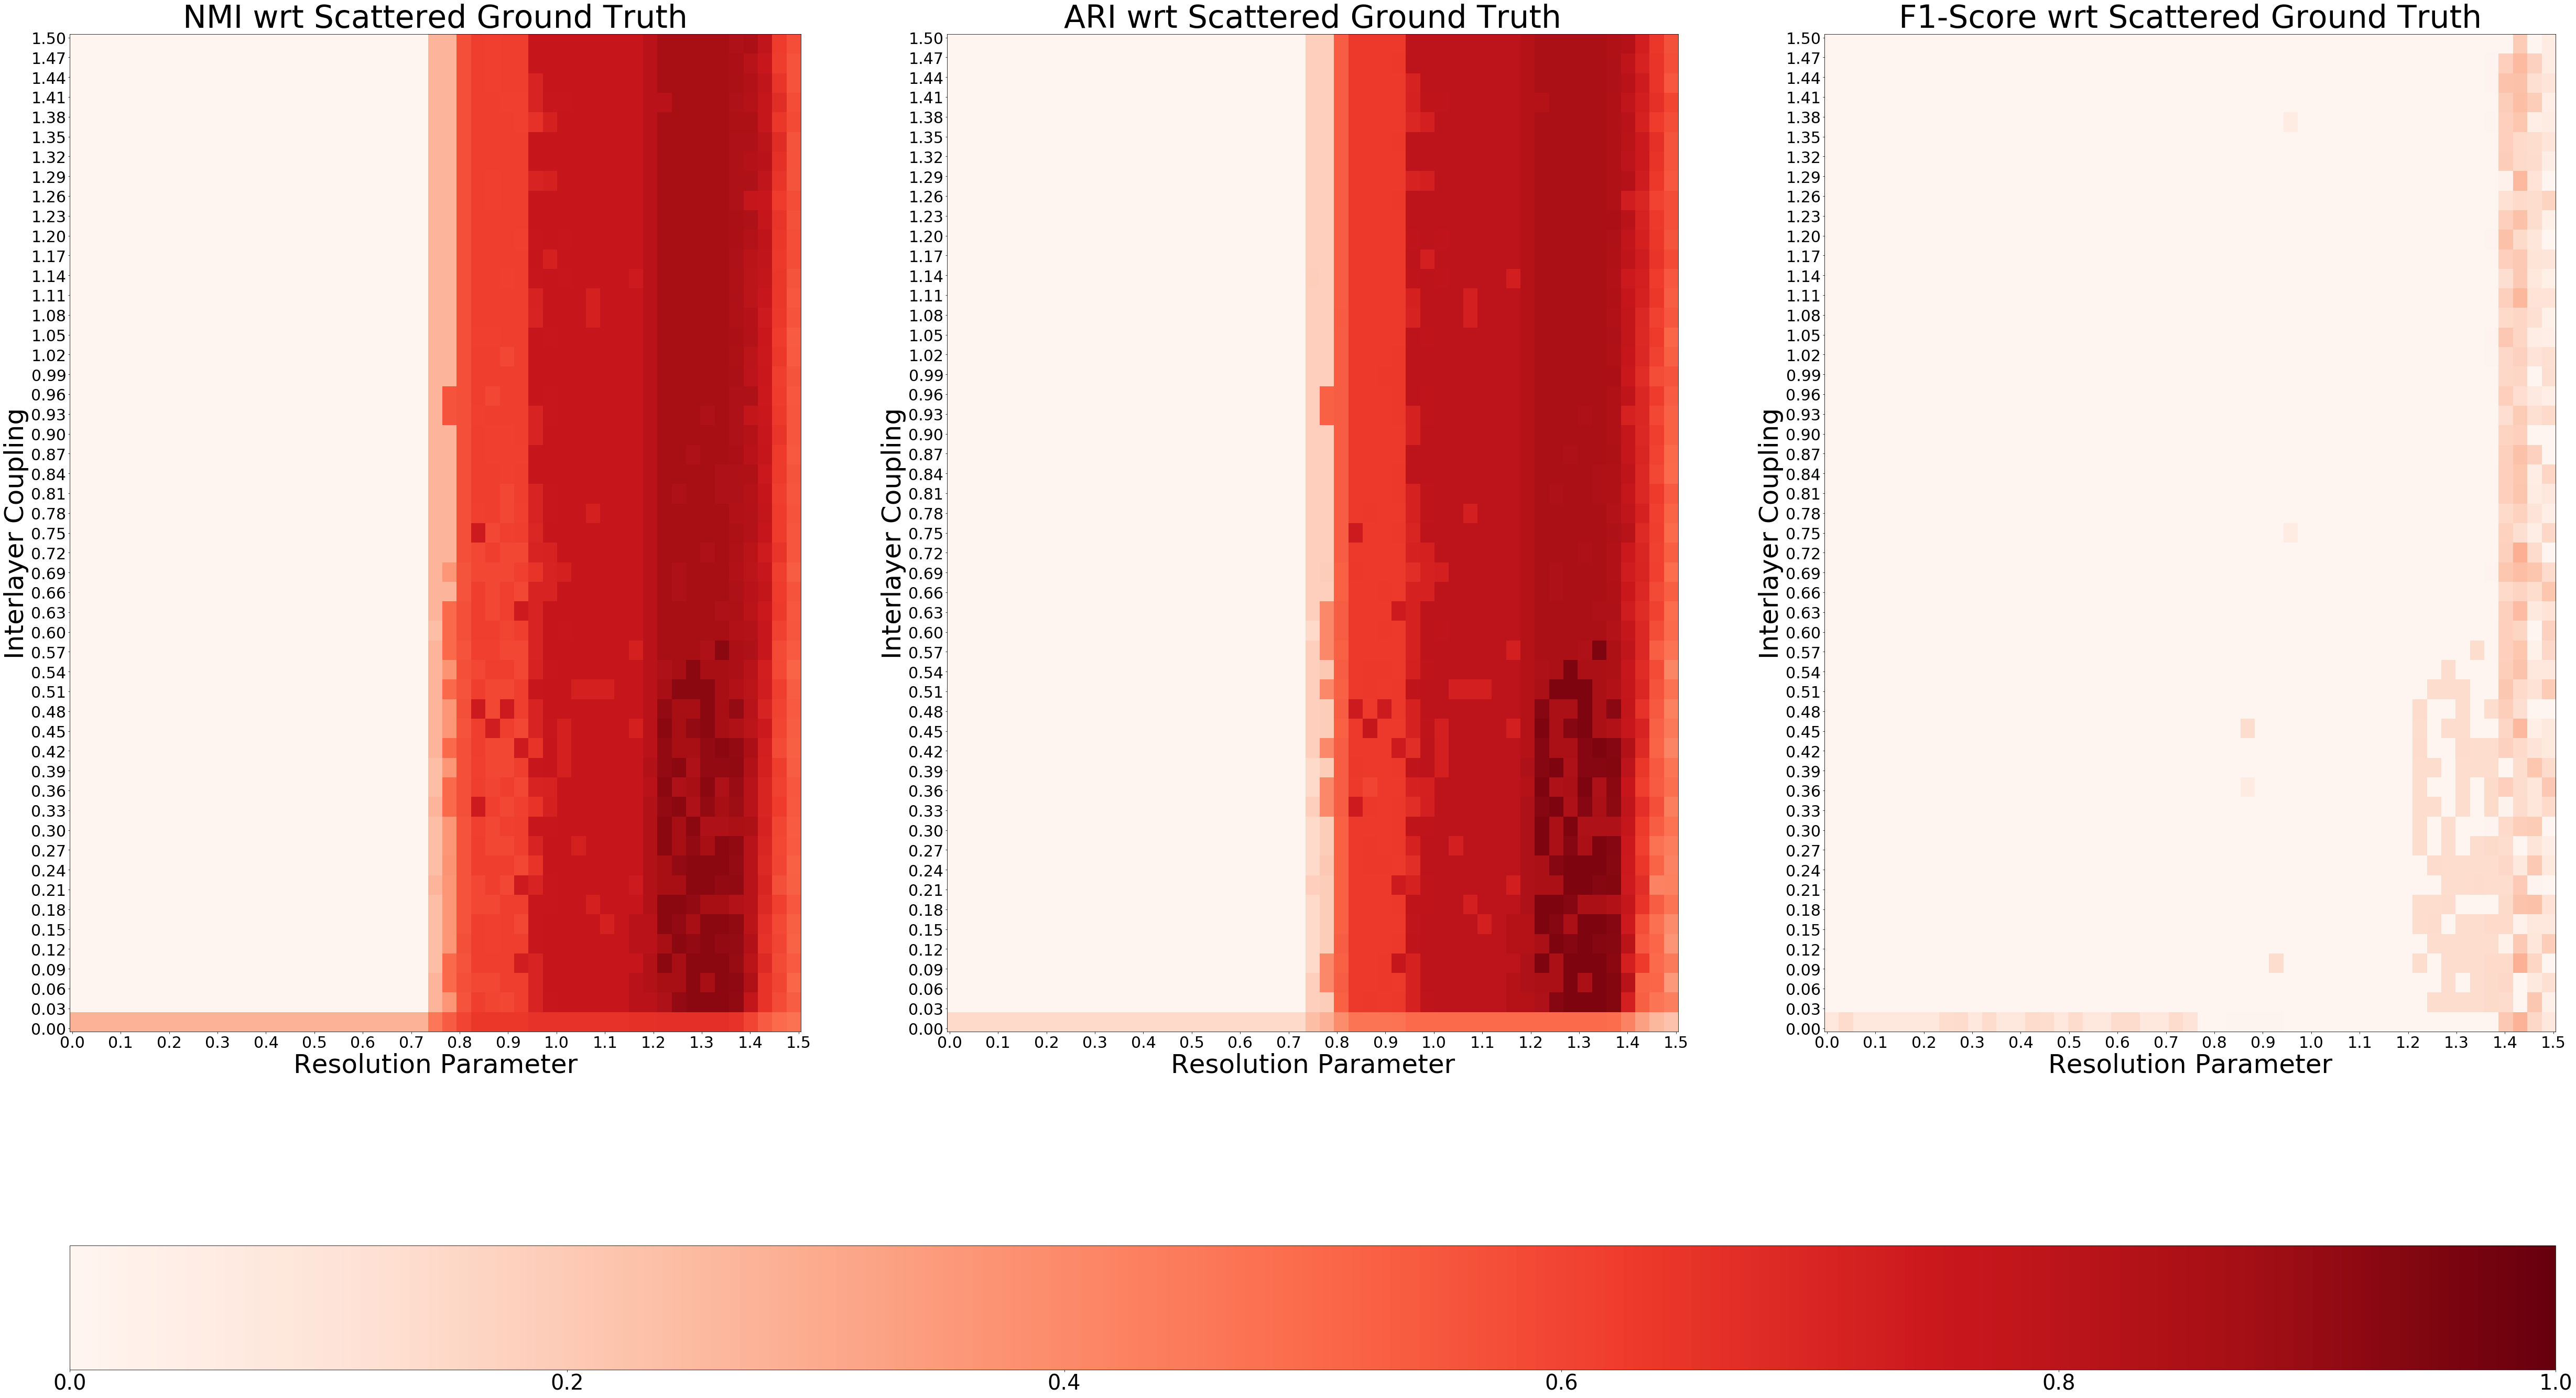

In [6]:
fig,ax = information_recovery(M_ESCR_labels2, M_ESCR_comm_sizes, 'Scattered', interlayers, resolutions,'merge')

In [10]:
max_recovery = np.zeros((56,624))##
for i,e in enumerate(interlayers[1:15]):##
    max_recovery[i*4:(i+1)*4] = M_ESCR_labels2[i*51+44:i*51+48]##

In [11]:
consensus_partition0 = community_consensus_iterative(max_recovery)##

In [15]:
n = sum(M_ESCR_comm_sizes[0])##
t = 4
comms, cmap, color = consensus_display(consensus_partition0, n, t)##

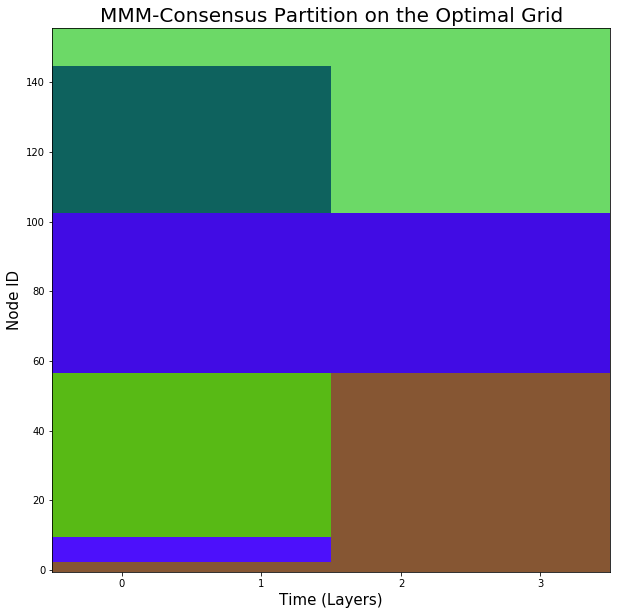

In [21]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(comms, interpolation = 'none', cmap = cmap, 
          aspect = 'auto', origin = 'lower', extent = [-0.5,t-0.5,-0.5,n-0.5])
ax.set_title('MMM-Consensus Partition on the Optimal Grid', fontsize = 20)
ax.set_xlabel('Time (Layers)', fontsize = 15)
ax.set_ylabel('Node ID', fontsize = 15)
ax.set_xticks([0,1,2,3])

## Community merge, heavy tail, changing rate, Infomap

In [8]:
path = '/Users/bengieru/MLN/Results/Comparison/M_ESCR/'

grid = 51
threshs = np.linspace(0, 0.8, grid)
inters = np.linspace(0, 1.5, grid)


with open(path + 'infomap_labels_nbr_update.pkl', 'rb') as handle:
    M_ESCR_labels3 = pickle.load(handle)
with open(path + 'infomap_labels_global_update.pkl', 'rb') as handle:
    M_ESCR_labels2 = pickle.load(handle)
with open(path + 'infomap_labels_local_update.pkl', 'rb') as handle:
    M_ESCR_labels1 = pickle.load(handle)
with open(path + 'infomap_labels_no_update.pkl', 'rb') as handle:
    M_ESCR_labels0 = pickle.load(handle)
    
with open(path + 'comm_size.pkl', 'rb') as handle:
    M_ESCR_comm_sizes = pickle.load(handle)
with open(path + 'spikes.pkl', 'rb') as handle:
    M_ESCR_spikes = pickle.load(handle)

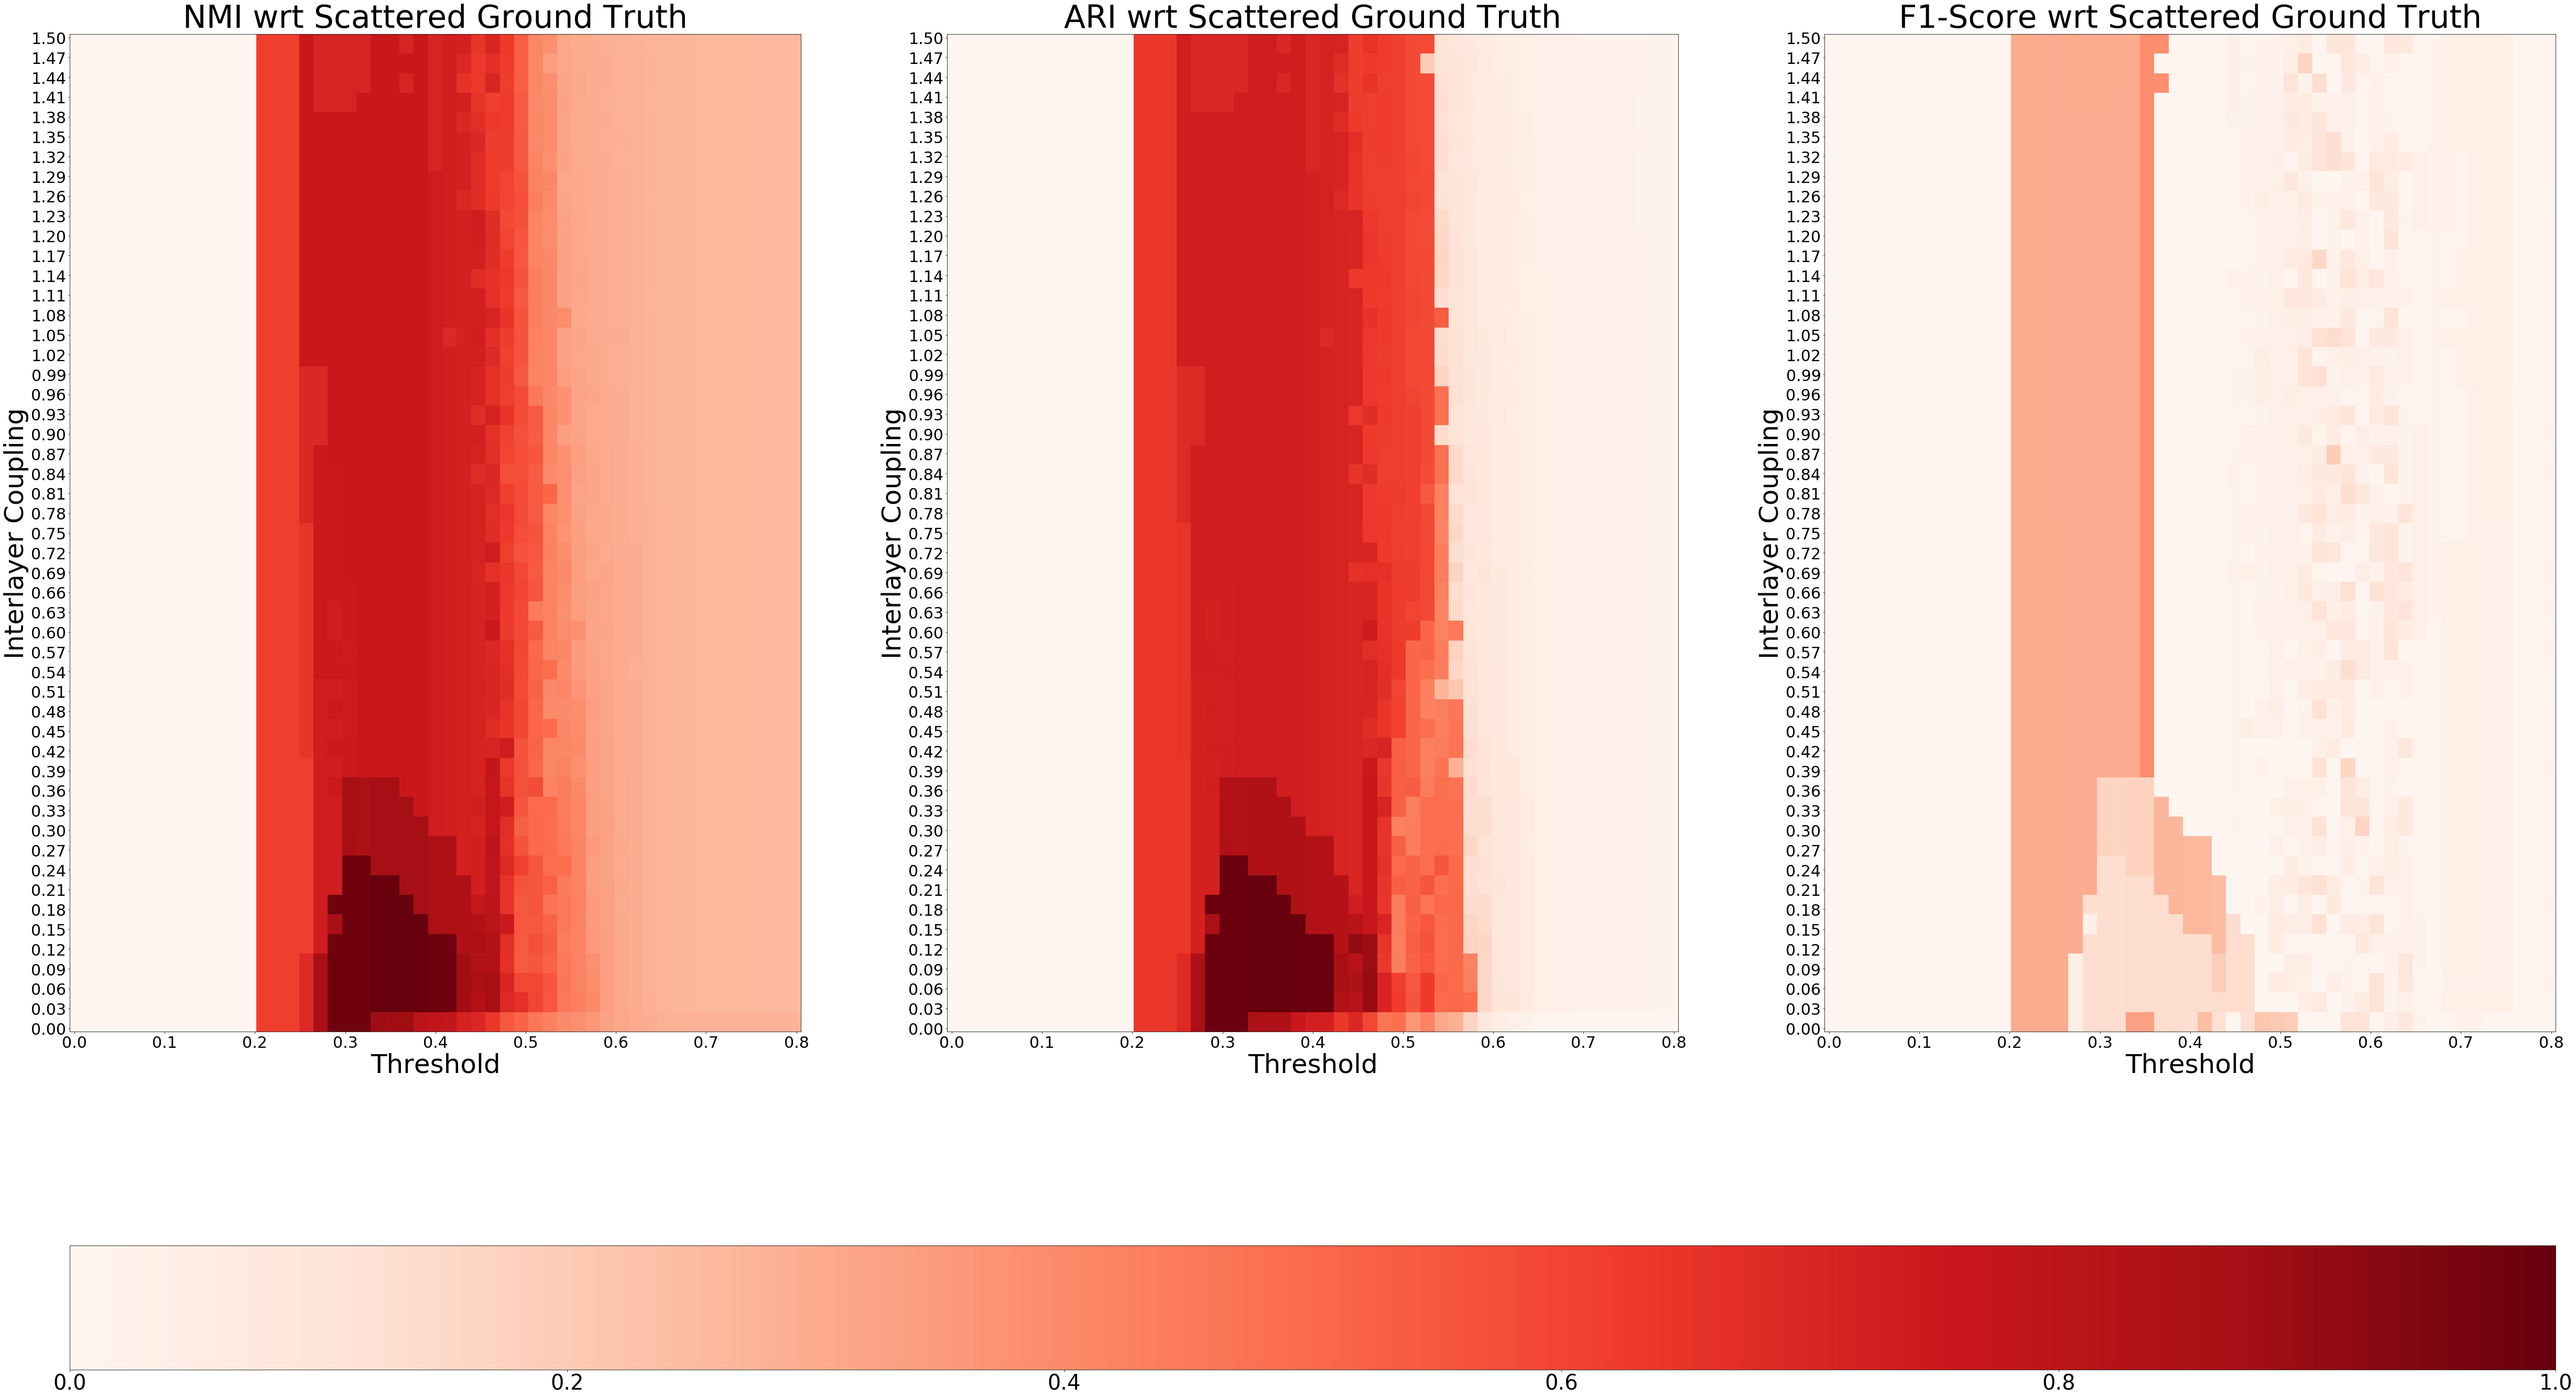

In [3]:
fig,ax = information_recovery(M_ESCR_labels0, M_ESCR_comm_sizes, 'Scattered', inters, threshs,'merge')

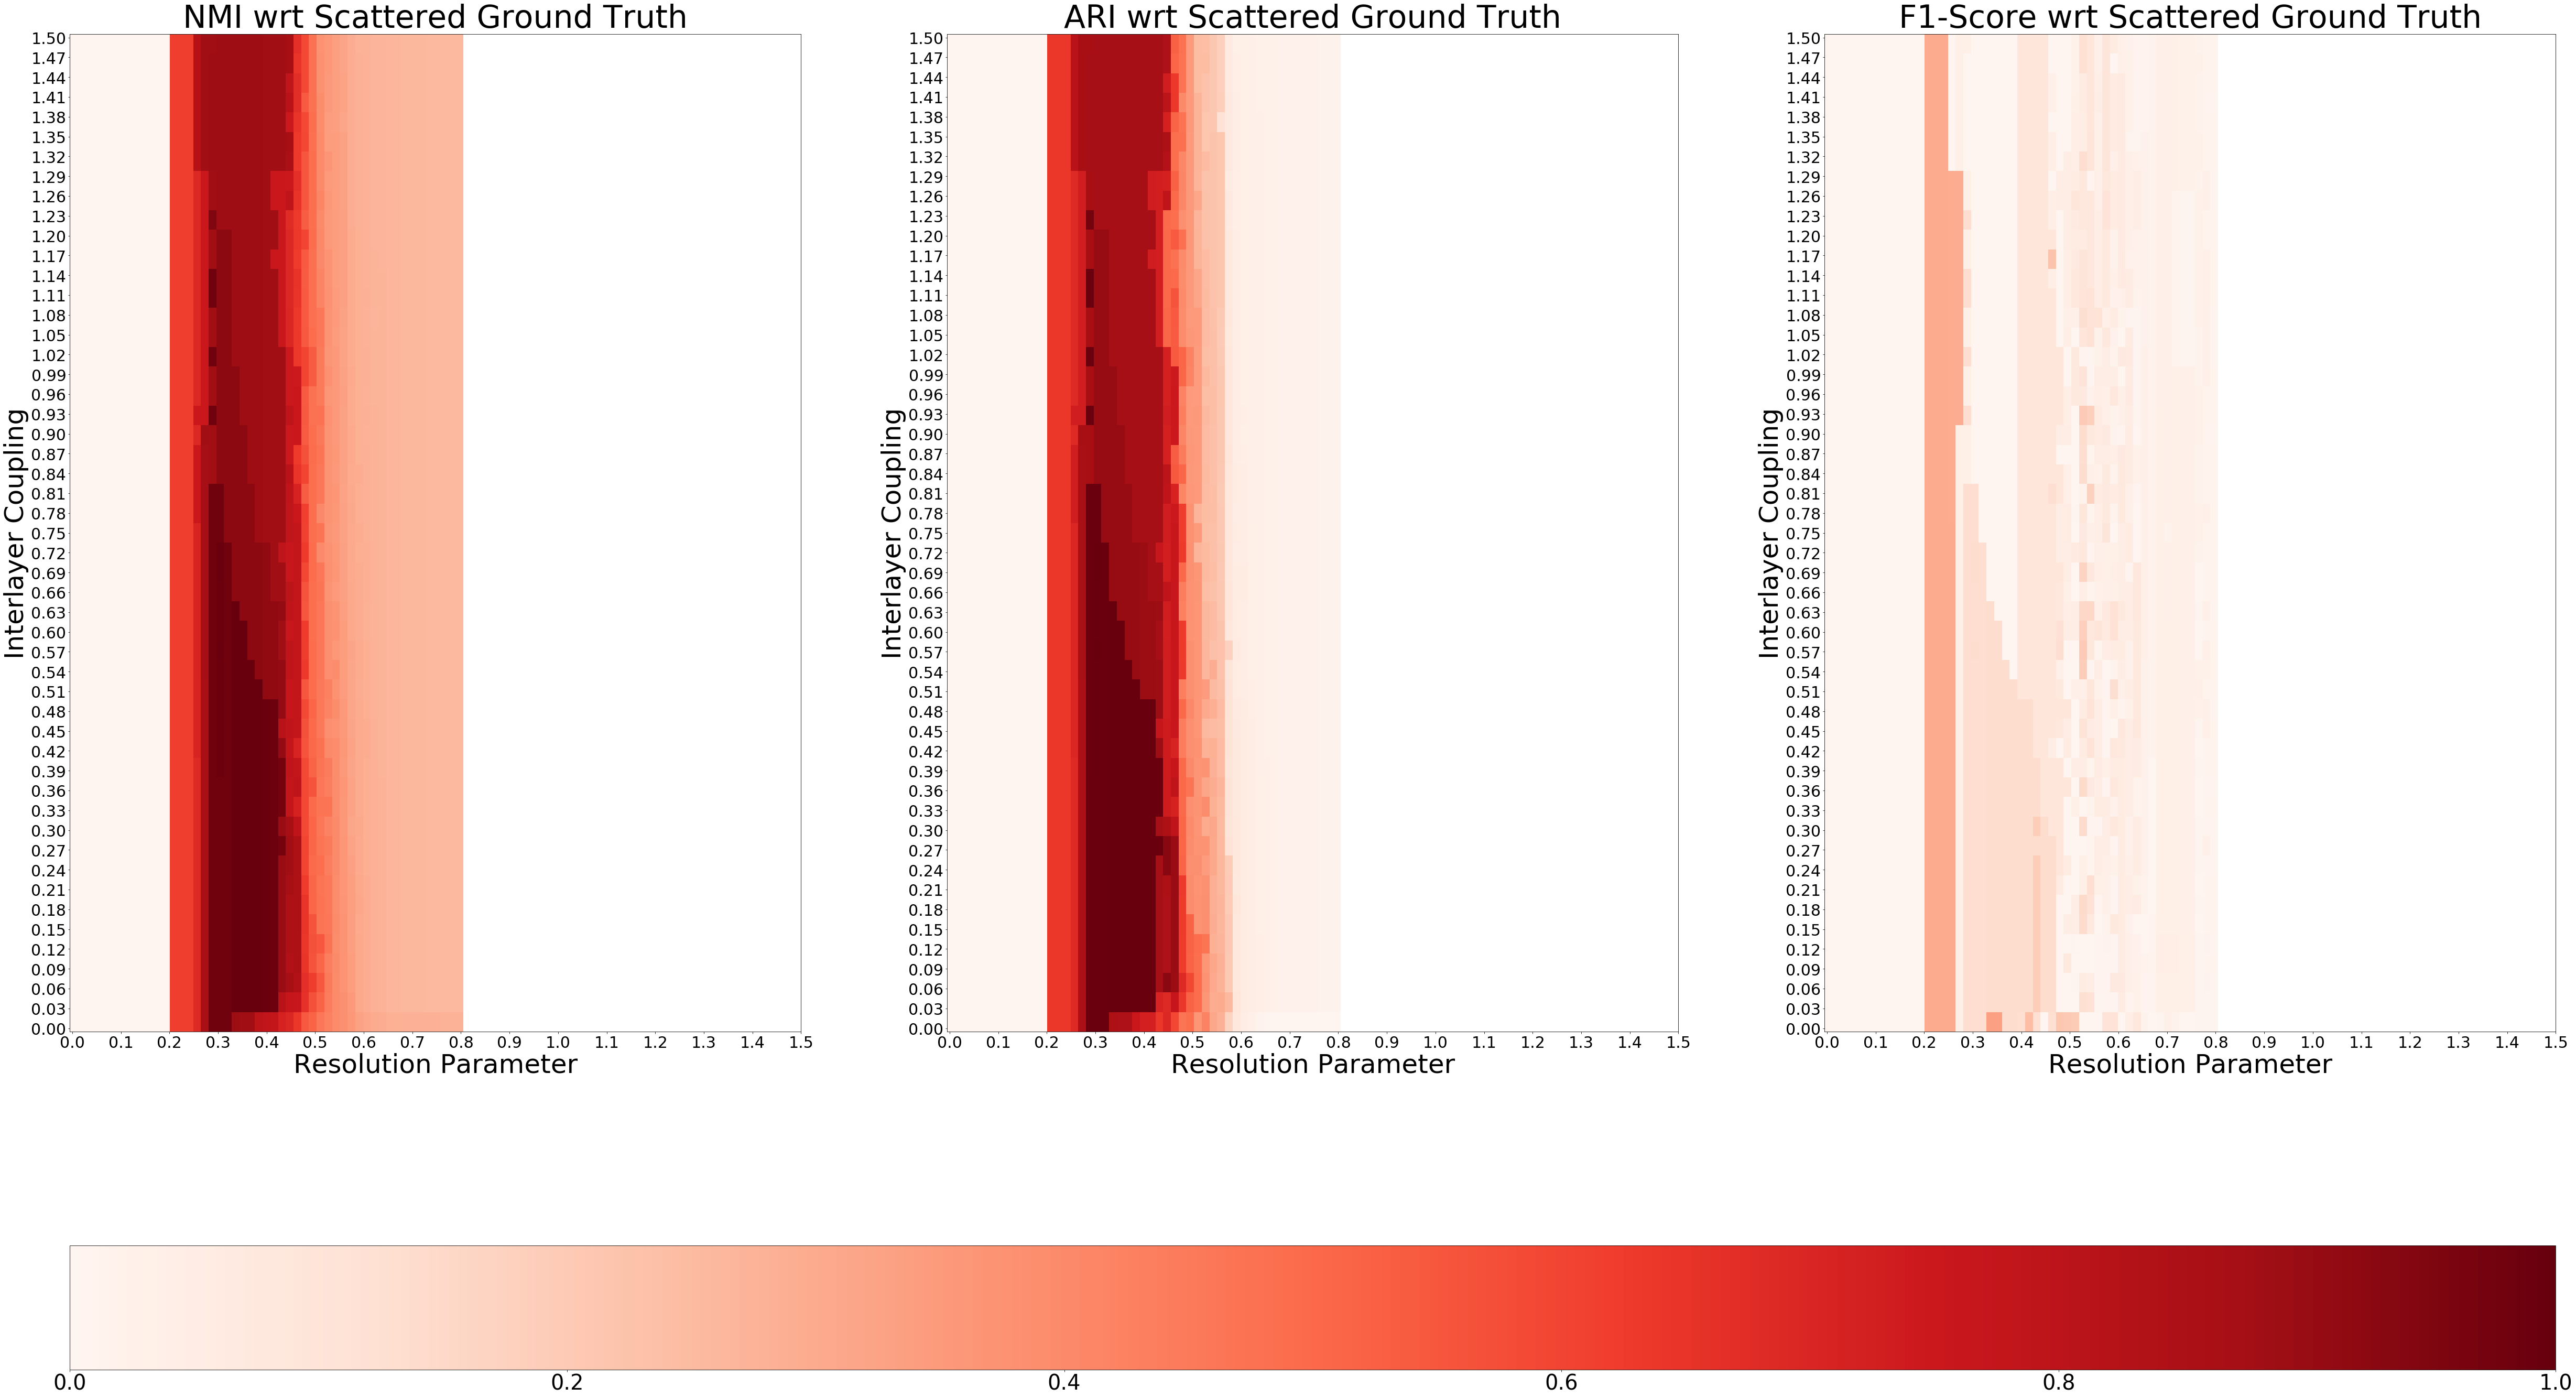

In [26]:
fig,ax = information_recovery(M_ESCR_labels1, M_ESCR_comm_sizes, 'Scattered', inters, threshs,'merge')

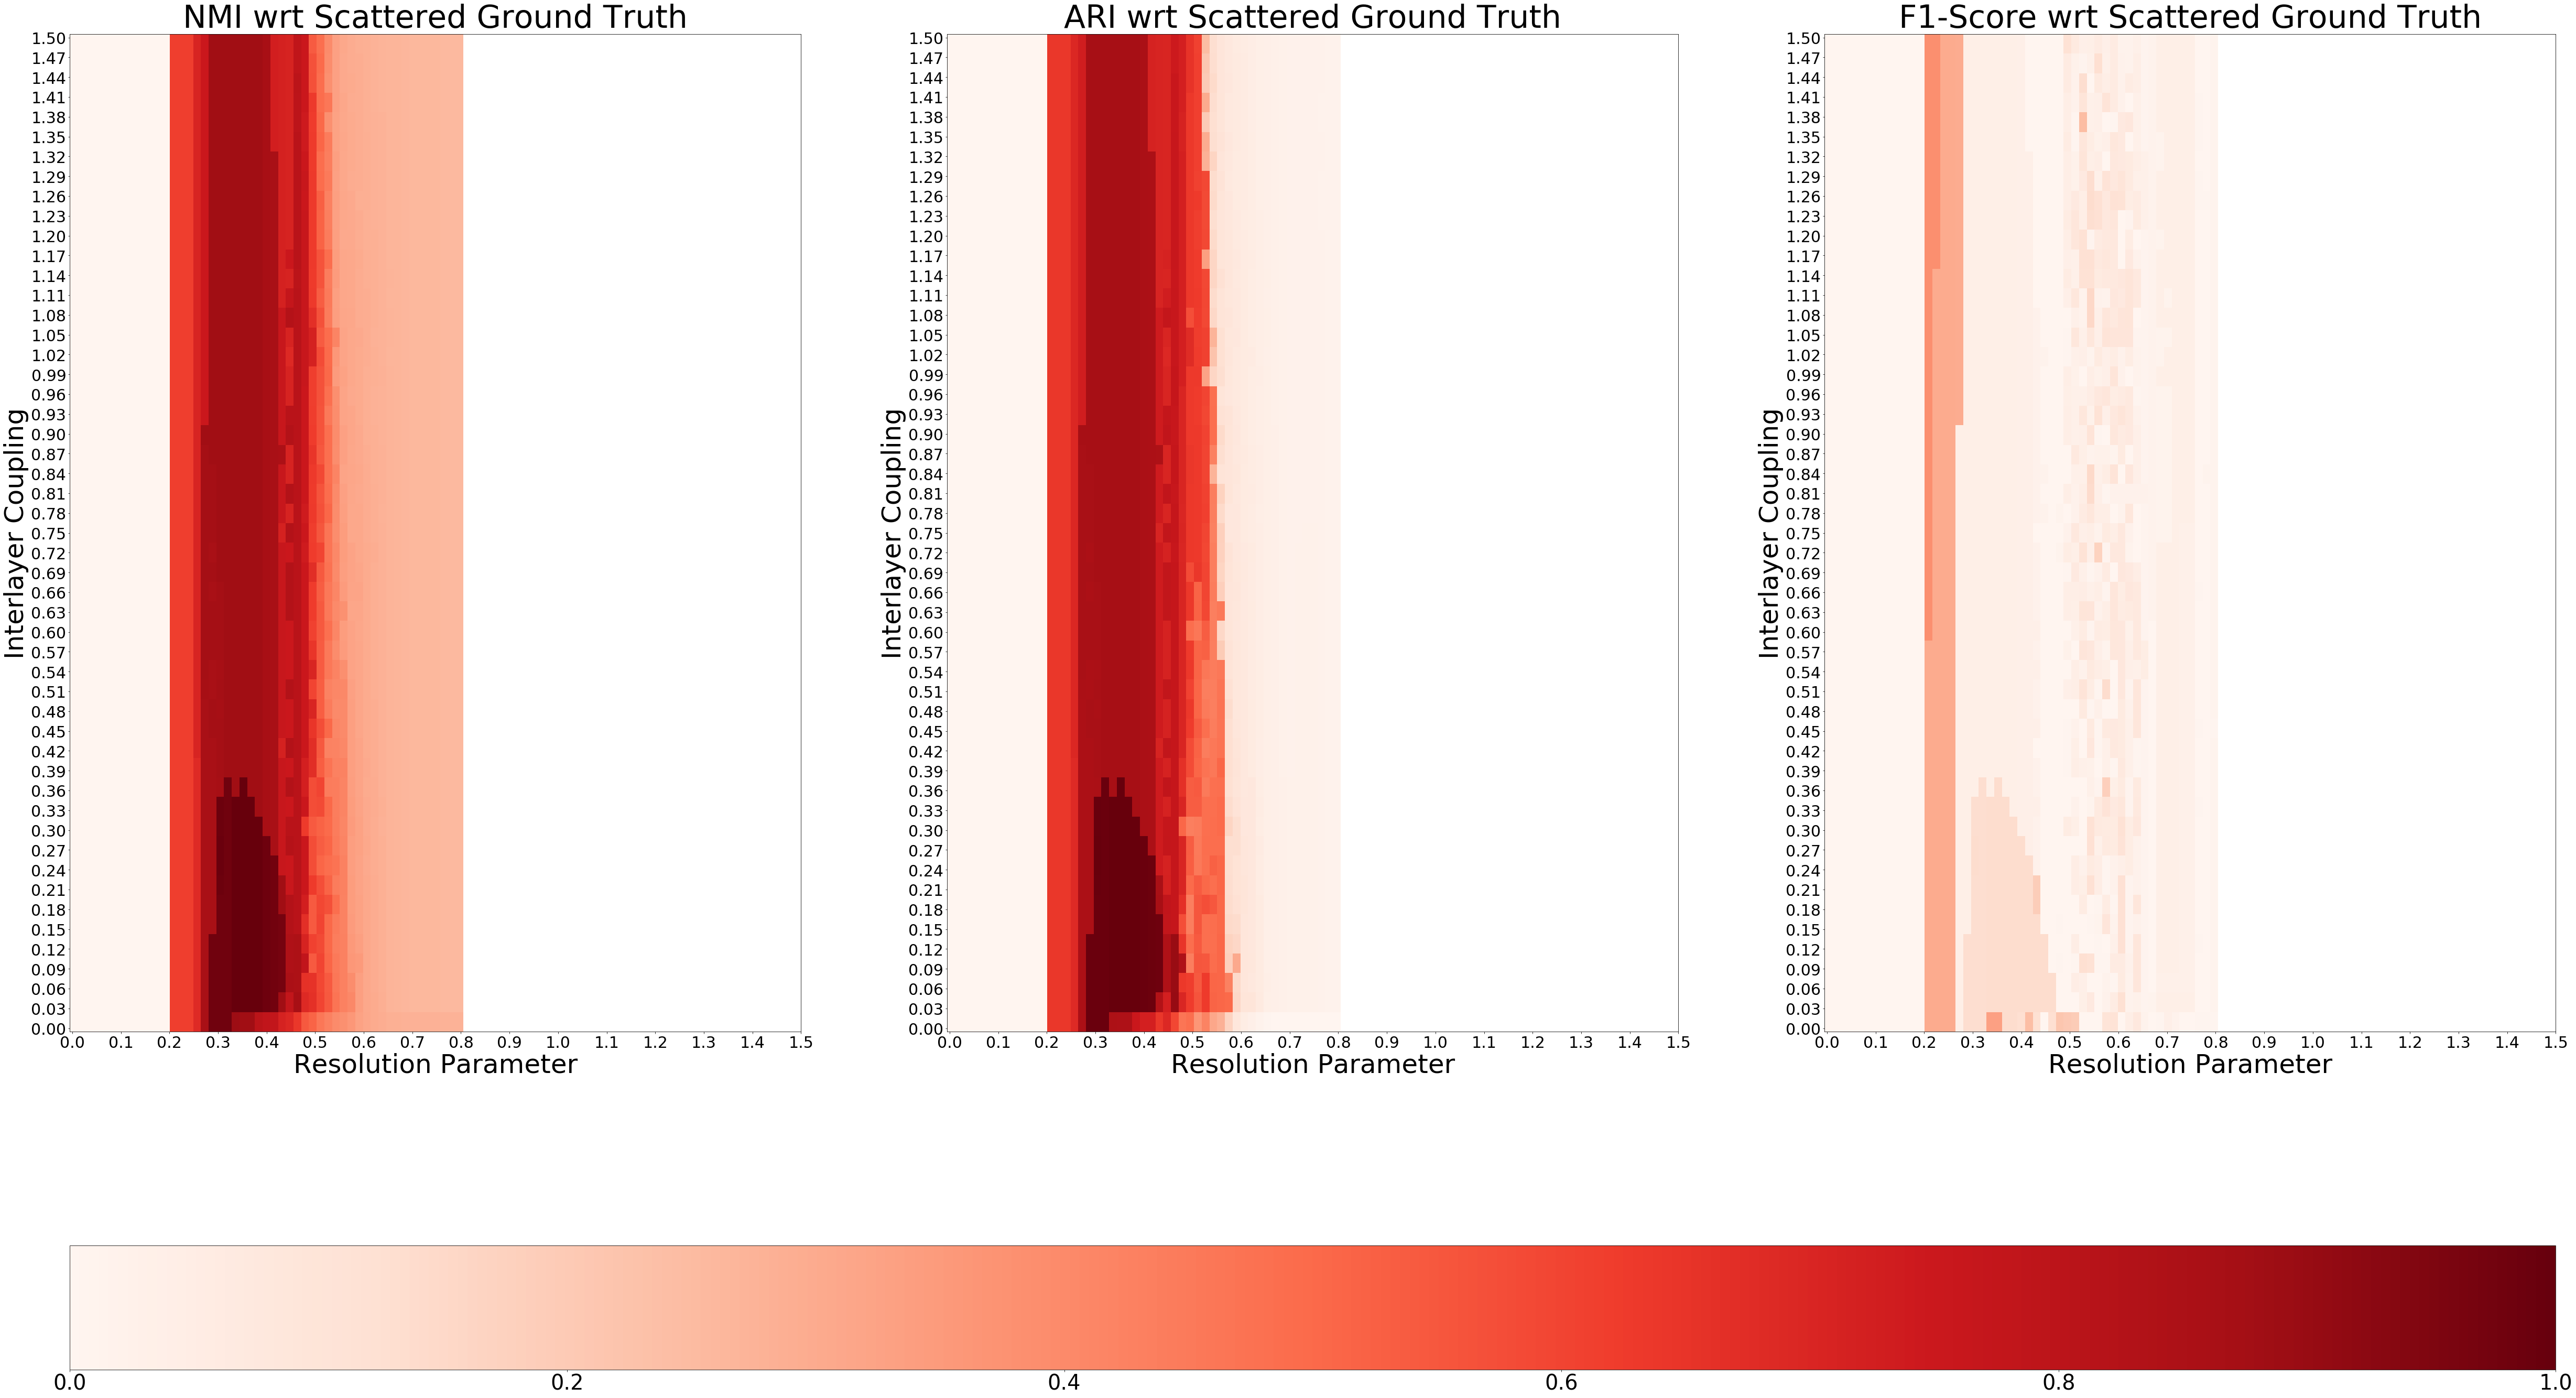

In [27]:
fig,ax = information_recovery(M_ESCR_labels2, M_ESCR_comm_sizes, 'Scattered', inters, threshs,'merge')

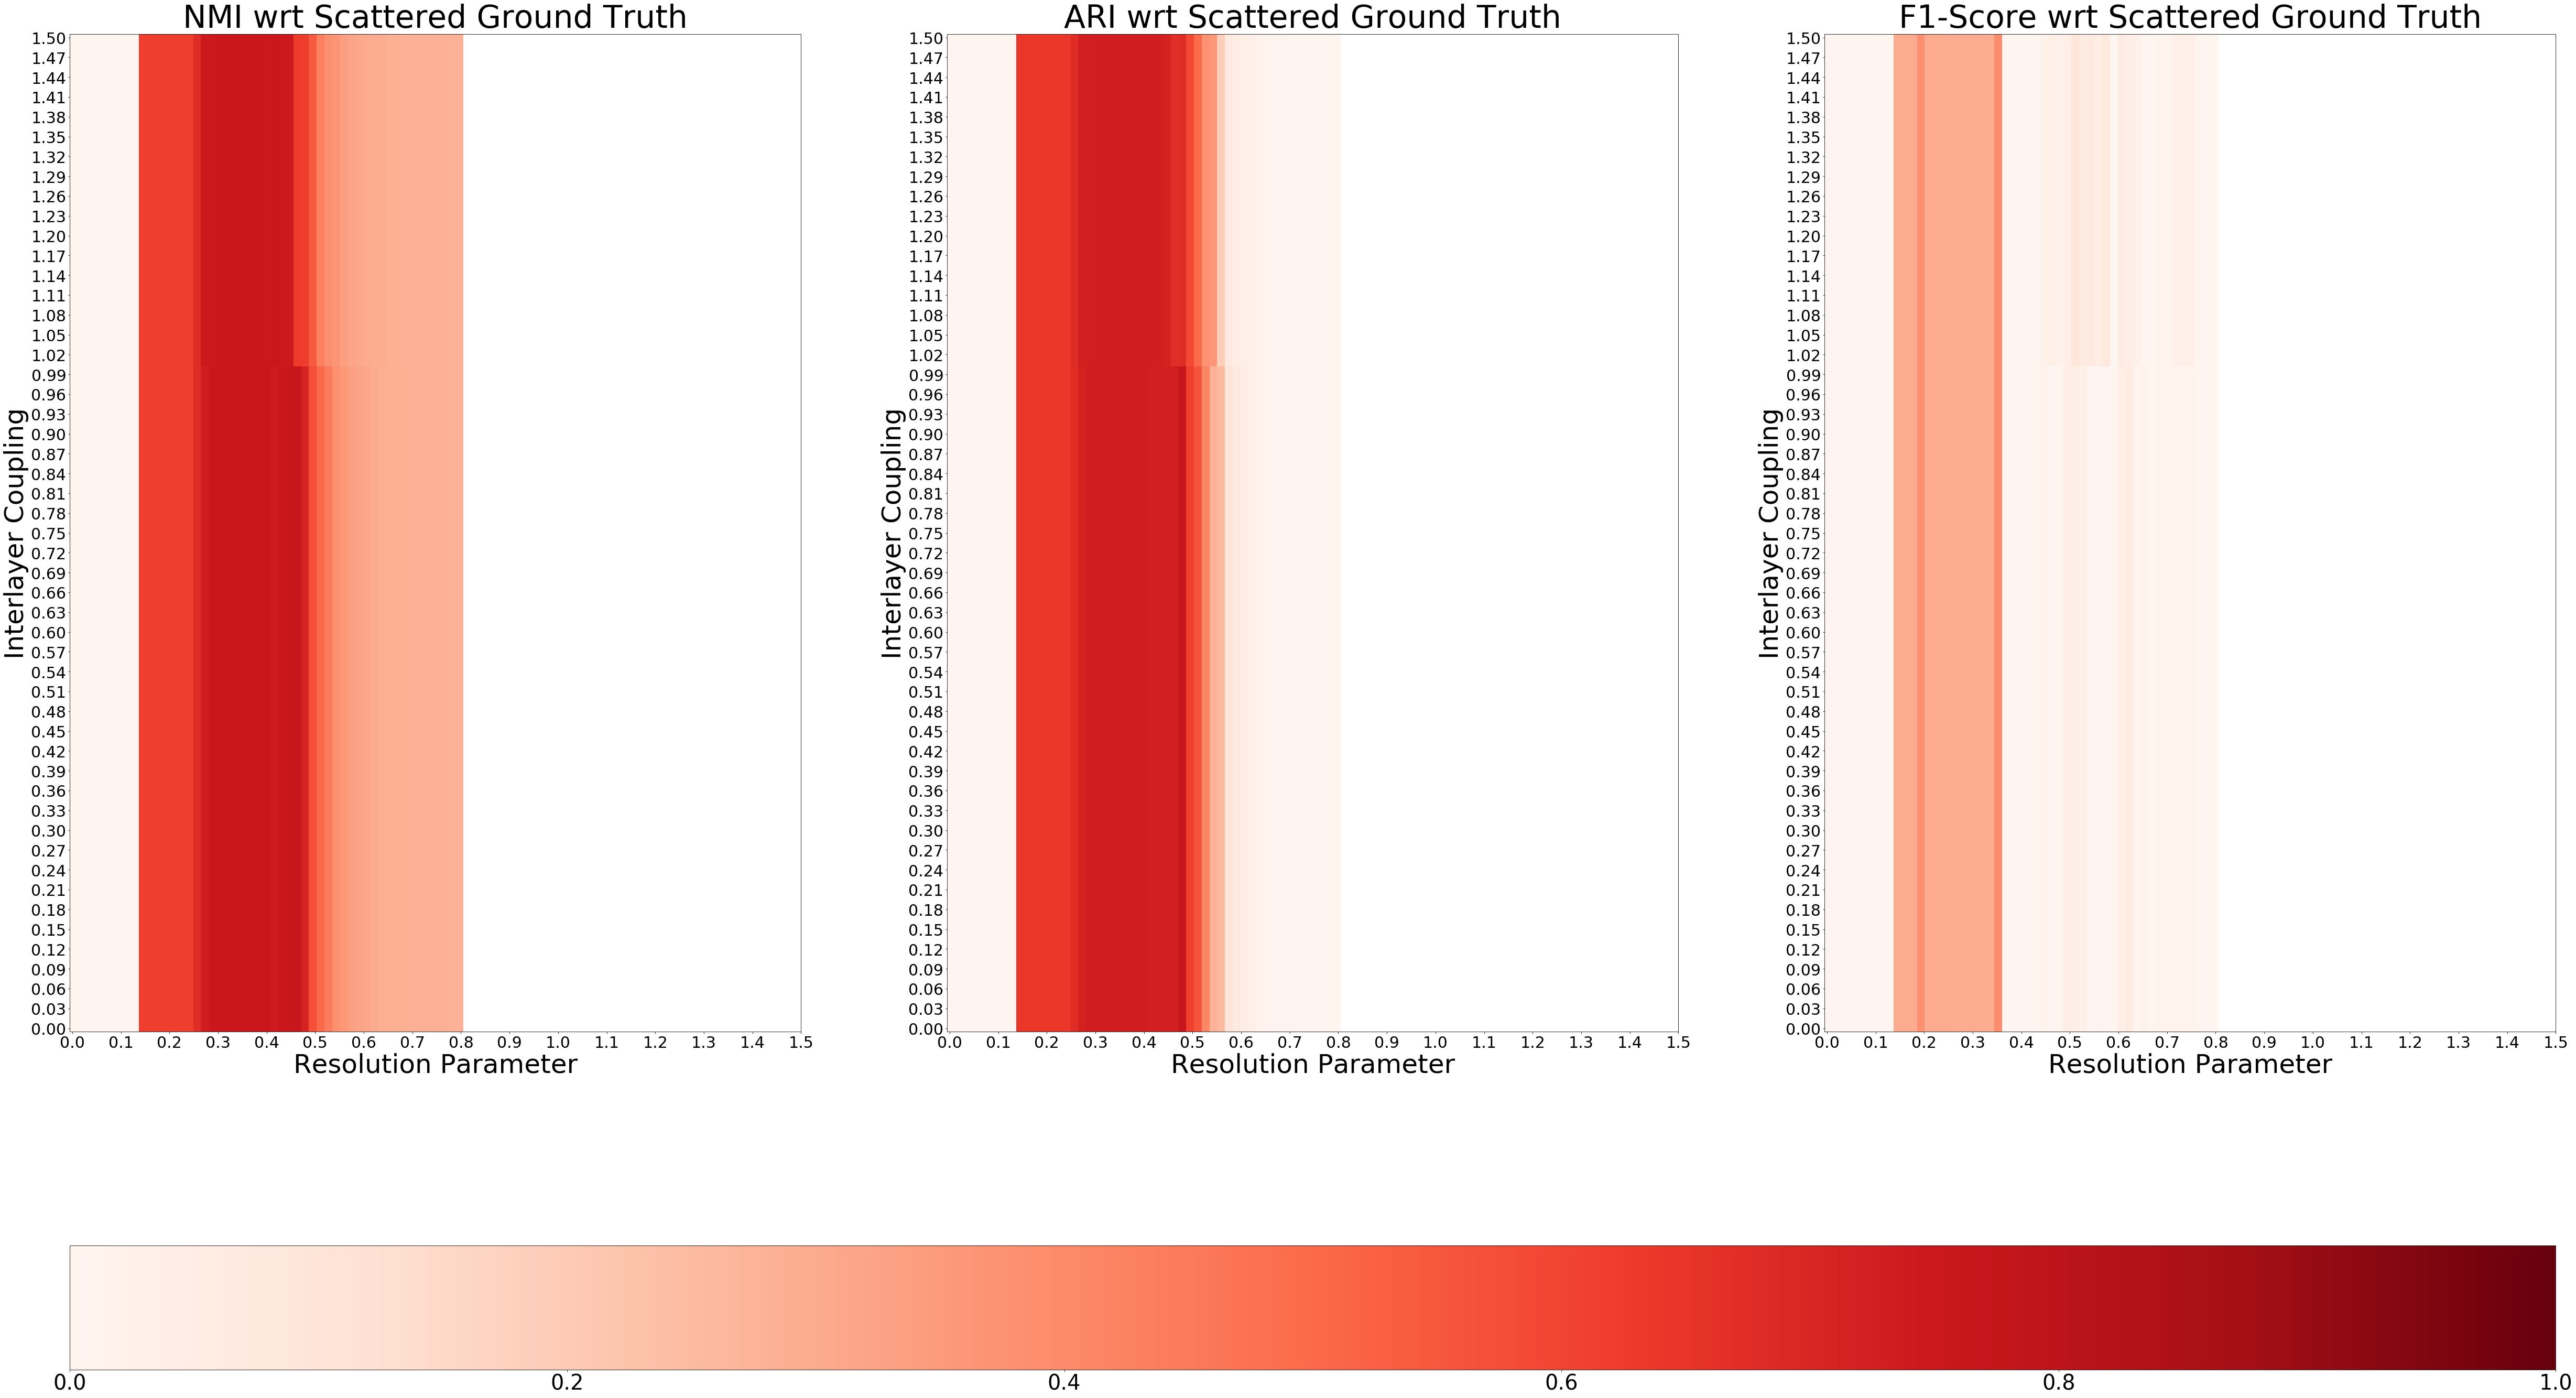

In [28]:
fig,ax = information_recovery(M_ESCR_labels3, M_ESCR_comm_sizes, 'Scattered', inters, threshs,'merge')

In [9]:
max_recovery = np.zeros((24,624))##
for i,e in enumerate(inters[1:5]):##
    max_recovery[i*6:(i+1)*6] = M_ESCR_labels0[i*51+19:i*51+25]##

In [10]:
consensus_partition0 = community_consensus_iterative(max_recovery)##

In [11]:
n = sum(M_ESCR_comm_sizes[0])##
t = 4
comms, cmap, color = consensus_display(consensus_partition0, n, t)##

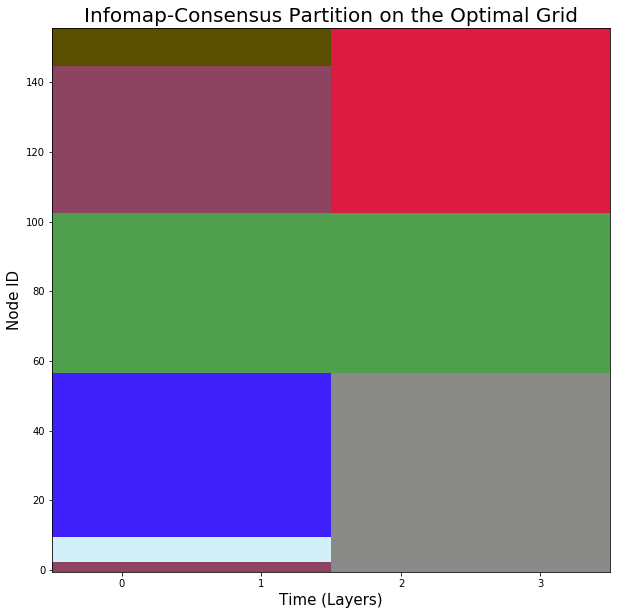

In [12]:
fig,ax = plt.subplots(1,1,figsize = (10,10))
ax.imshow(comms, interpolation = 'none', cmap = cmap, 
          aspect = 'auto', origin = 'lower', extent = [-0.5,t-0.5,-0.5,n-0.5])
ax.set_title('Infomap-Consensus Partition on the Optimal Grid', fontsize = 20)
ax.set_xlabel('Time (Layers)', fontsize = 15)
ax.set_ylabel('Node ID', fontsize = 15)
ax.set_xticks([0,1,2,3])

CPU times: user 26 s, sys: 179 ms, total: 26.1 s
Wall time: 26.5 s


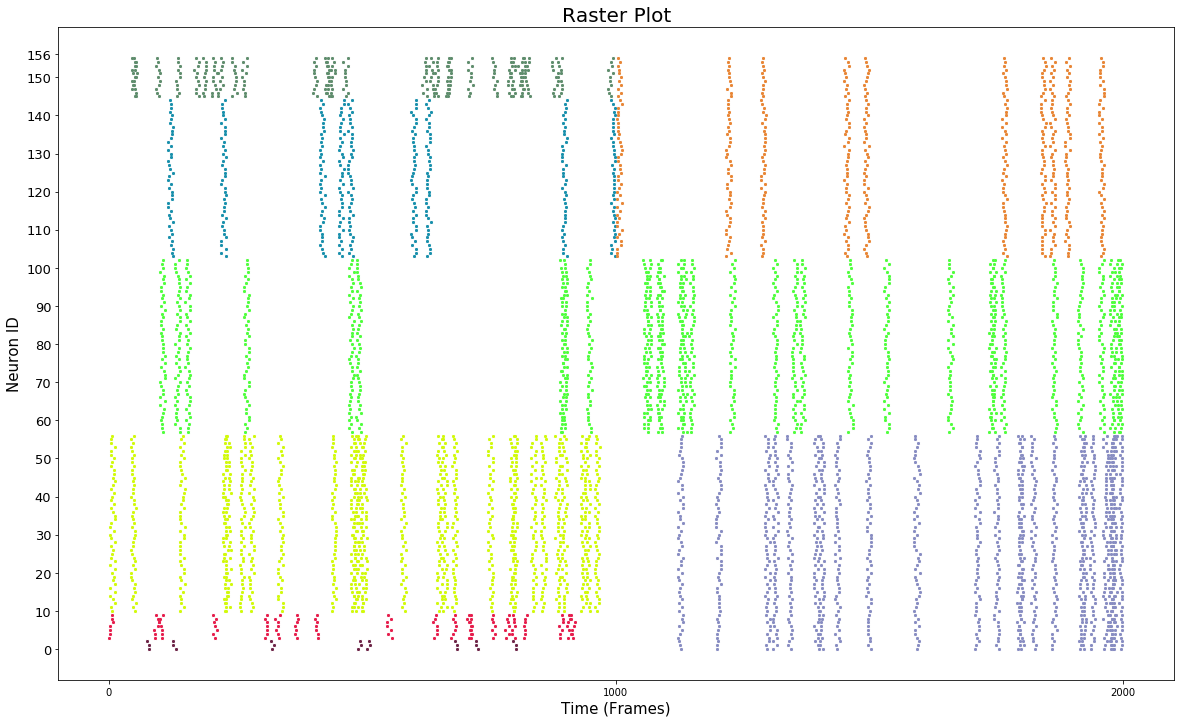

In [16]:
%%time
binsize = 1000
binned_spikes = bin_time_series(M_ESCR_spikes, binsize, gaussian = False)##
l,n,t = binned_spikes.shape
                    
sp = np.nonzero(binned_spikes)

clr = comms[:,1:3]##
fig,ax = plt.subplots(1,1,figsize = (20,12)) 
for i in range(len(sp[0])):
    ax.scatter(sp[0][i]*binsize+sp[2][i],  sp[1][i], s = 5, 
               c = color[int(clr[sp[1][i]][sp[0][i]])], marker = 'x', cmap = cmap)
ax.set_title('Raster Plot', fontsize = 20)
ax.set_xlabel('Time (Frames)', fontsize = 15)
ax.set_ylabel('Neuron ID', fontsize = 15)
ax.set_xticks([t*i for i in range(l+1)])
ax.set_yticks([10*i for i in range(int(n/10)+1)]+[n])
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 13)